# Infuencers Case Study
### Tasks:
### How will you rank the influencers?
### What are the different metrics that should be considered while assessing the quality of influencers?
### Design a scoring mechanism to rank the influencers.
### Given the pricing, design a campaign which will minimize the cost per 1000 followers.
### What changes will you make to the above campaign if quality of influencers is also taken into account?


In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Zakir khan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading excel worksheet Base Data file in python
Bd = pd.read_excel('Data Analyst Intern_ Case Study.xlsx', sheet_name = 'Base Data') 

In [3]:
Bd.head()

,user_id,twitter_handle,followers_count,following_count,tweet_count,created_at,location,name,Unnamed: 8
0,1361064698557263873,CryptoTheBeast_,26299,327,1584,2021-02-14T21:28:42.000Z,Own Kingdom♔,Crypto Beast,NaN
1,1295347046530998272,TheGod0fThunder,40363,470,1506,2020-08-17T13:09:47.000Z,Asgard,THE GOD OF THUNDER ( THOR⚡),NaN
2,1141676914454618112,RTA_Squad007,20509,92,1096,2019-06-20T11:59:22Z,NaN,RTA123,NaN
3,1288180753491140608,Cryptodiamond20,8655,1067,704,2020-07-28T18:34:29.000Z,"Los Angles, USA",Diamond Gem,NaN
4,1265598537443602432,CryptoProf_,19881,215,575,2020-05-27T10:59:51Z,OnTheMoon,PROFESSOR 🔥,NaN


In [4]:
# variable info and number of row and col
Bd.info()
Bd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          17 non-null     int64  
 1   twitter_handle   17 non-null     object 
 2   followers_count  17 non-null     int64  
 3   following_count  17 non-null     int64  
 4   tweet_count      17 non-null     int64  
 5   created_at       17 non-null     object 
 6   location         11 non-null     object 
 7   name             17 non-null     object 
 8   Unnamed: 8       0 non-null      float64
dtypes: float64(1), int64(4), object(4)
memory usage: 1.3+ KB


(17, 9)

In [5]:
# drop unwamted variable
Bd.drop(['Unnamed: 8'], axis = 1)

,user_id,twitter_handle,followers_count,following_count,tweet_count,created_at,location,name
0,1361064698557263873,CryptoTheBeast_,26299,327,1584,2021-02-14T21:28:42.000Z,Own Kingdom♔,Crypto Beast
1,1295347046530998272,TheGod0fThunder,40363,470,1506,2020-08-17T13:09:47.000Z,Asgard,THE GOD OF THUNDER ( THOR⚡)
2,1141676914454618112,RTA_Squad007,20509,92,1096,2019-06-20T11:59:22Z,NaN,RTA123
3,1288180753491140608,Cryptodiamond20,8655,1067,704,2020-07-28T18:34:29.000Z,"Los Angles, USA",Diamond Gem
4,1265598537443602432,CryptoProf_,19881,215,575,2020-05-27T10:59:51Z,OnTheMoon,PROFESSOR 🔥
5,1132293684991545345,CryptoBTCWolf,8550,133,376,2019-05-25T14:33:46Z,BTC,CryptoBTCWolf👑
6,1069147269130145792,uniswap_gem,210080,489,96,2018-12-02T08:32:27.000Z,"London, England",Uniswap Gem 💎
7,1382741755037061121,taki_crypto,9578,11,66,2021-04-15T17:05:52.000Z,NaN,Crypto Taki
8,3087274114,FlameCryptos,7883,539,1253,2015-03-11T16:48:23.000Z,NaN,FlameCryptos
9,1073173166388797441,bitlord_king,15690,62,360,2018-12-13T11:09:56.000Z,NaN,Bitlord King


In [6]:
#reading excel worksheet Tweets Data file in python
Td = pd.read_excel('Data Analyst Intern_ Case Study.xlsx', sheet_name ='Tweets Data')

In [7]:
Td.head()

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name
0,1403643238850908162,$TAPE @ape_tools \n\nThe best trading tool on ...,2021-06-12T09:20:01.000Z,en,17.0,8.0,61.0,2,-,-,uniswap_gem
1,1402771353527279617,@BTC_NFT @jmanzi123 @beyondprotocol1 Interesti...,2021-06-09T23:35:27.000Z,en,0.0,0.0,0.0,0,"[{'type': 'replied_to', 'id': '140273073953632...",1286249381155479553,uniswap_gem
2,1402735552189792259,RT @Block_Flash: Beyond Protocol @beyondprotoc...,2021-06-09T21:13:11.000Z,en,4.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1402733927895224...",-,uniswap_gem
3,1402308360318291972,RT @Block_Flash: The #1 BSC Launchpad #BSCPAD ...,2021-06-08T16:55:41.000Z,en,5.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1402308109339529...",-,uniswap_gem
4,1402306569681788930,$TAPE will be indisputable price tracker on BS...,2021-06-08T16:48:34.000Z,en,10.0,0.0,313.0,0,-,-,uniswap_gem


In [8]:
Td.info()
Td.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29805 entries, 0 to 29804
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           29805 non-null  object 
 1   tweet_text         29805 non-null  object 
 2   created_at         29804 non-null  object 
 3   language           29804 non-null  object 
 4   num_retweets       29804 non-null  float64
 5   num_replies        29804 non-null  float64
 6   num_likes          29804 non-null  float64
 7   num_quotes         29804 non-null  object 
 8   referenced_tweets  29357 non-null  object 
 9   reply_to_userid    29804 non-null  object 
 10  user_name          29804 non-null  object 
dtypes: float64(3), object(8)
memory usage: 2.5+ MB


(29805, 11)

In [9]:
#reading excel worksheet Pricing Data file in python
PD = pd.read_excel('Data Analyst Intern_ Case Study.xlsx', sheet_name = 'Pricing Data') 

In [10]:
PD.head(10)

,Influencer,Actual Cost
0,Cryptodiamond20,100
1,selenaroyf,50
2,RTA_Squad007,250
3,FlameCryptos,350
4,bitlord_king,300
5,TheGod0fThunder,400
6,CryptoGaelic,350
7,CryptoProf_,300
8,CryptoNoora,500
9,CryptoBTCWolf,200


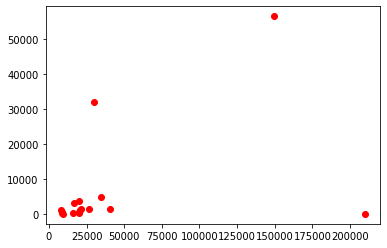

In [11]:
plt.scatter(x='followers_count', y='tweet_count',data=Bd,c='red') #correlation btw followers vs tweets

Above show tell not much about relationship between followers and tweets 

In [12]:
PD.info()
PD.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Influencer   17 non-null     object
 1   Actual Cost  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


(17, 2)

# How will you rank the influencers?

In [13]:
# soting values with tweets
df=Bd.sort_values(['tweet_count','followers_count'], ascending=[False,True])
df.head(10)

,user_id,twitter_handle,followers_count,following_count,tweet_count,created_at,location,name,Unnamed: 8
13,1042176455088726016,CryptoFinally,149356,1305,56461,2018-09-18T22:20:04.000Z,Decentralized,CryptoFinally 💫,NaN
14,179466197,cryptobrass,30023,2714,32017,2010-08-17T10:45:11.000Z,blockchain,CryptoBrass,NaN
10,1275640088559366145,Definews_Info,34877,220,4910,2020-06-24T04:02:07Z,Crypto News & Data Space,🌐 DeFi News 🌐,NaN
16,1331971465604960258,selenaroyf,19906,131,3784,2020-11-26 20:12:08,Toronto,Selena 🇨🇦🦋🌕,NaN
11,916617540540932098,CryptoGaelic,16980,564,3304,2017-10-07T10:53:46.000Z,NaN,Crypto Gaelic,NaN
15,1299380783329824768,BitcoinSorority,21432,103,1601,2020-08-28 21:48:51,Decentralized,The Sorority ✨,NaN
0,1361064698557263873,CryptoTheBeast_,26299,327,1584,2021-02-14T21:28:42.000Z,Own Kingdom♔,Crypto Beast,NaN
1,1295347046530998272,TheGod0fThunder,40363,470,1506,2020-08-17T13:09:47.000Z,Asgard,THE GOD OF THUNDER ( THOR⚡),NaN
8,3087274114,FlameCryptos,7883,539,1253,2015-03-11T16:48:23.000Z,NaN,FlameCryptos,NaN
2,1141676914454618112,RTA_Squad007,20509,92,1096,2019-06-20T11:59:22Z,NaN,RTA123,NaN


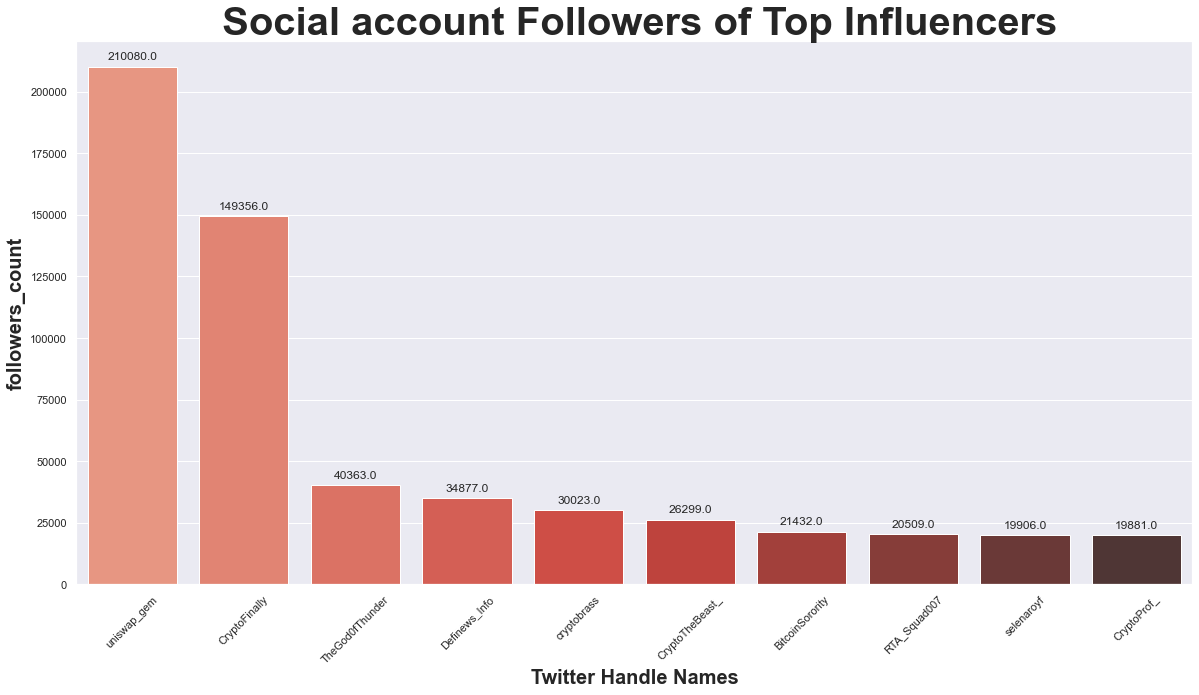

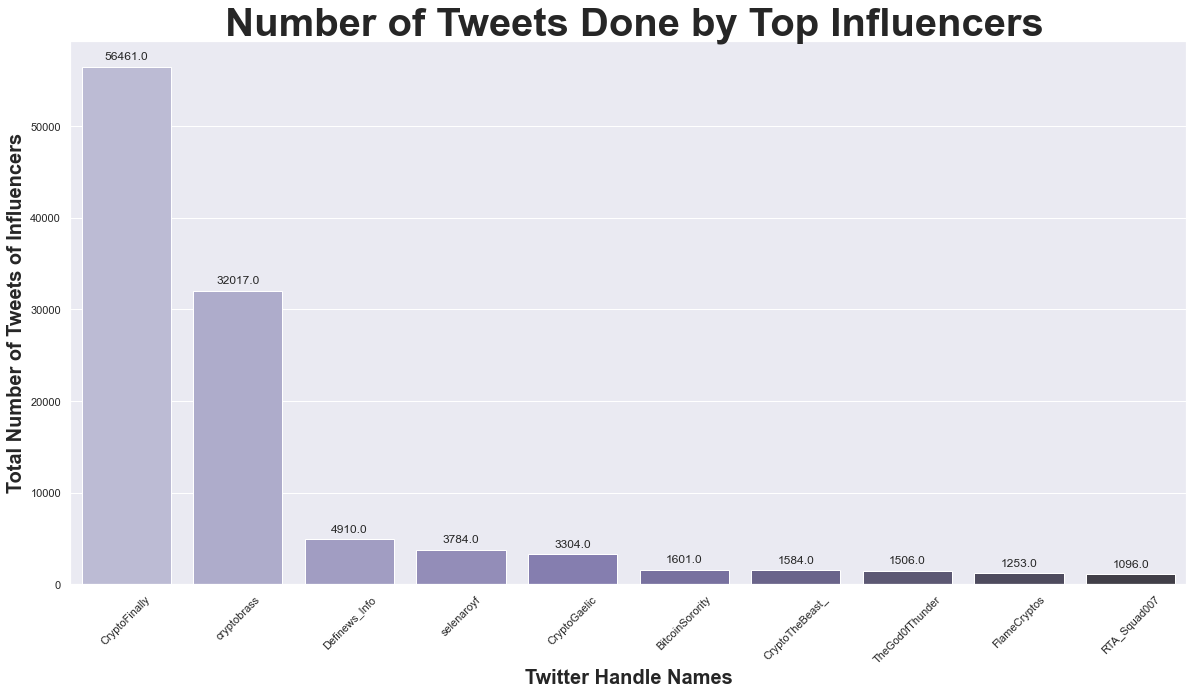

In [14]:
##data visualization - influencers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from openpyxl import Workbook

#bar plot - reach score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax = sns.barplot(x='twitter_handle', y='followers_count', palette="Reds_d",
                data=df.sort_values(by='followers_count', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y labels of the plot
ax.set_title(" Social account Followers of Top Influencers", size=40, weight='bold')
ax.set_xlabel("Twitter Handle Names", size=20, weight='bold')
ax.set_ylabel("followers_count", size=20, weight='bold')

#changing the rotation of the x axis tick labels 
for item in ax.get_xticklabels():
    item.set_rotation(45)
    


#bar plot - popularity score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax2 = sns.barplot(x='twitter_handle', y='tweet_count', palette="Purples_d",
                data=df.sort_values(by='tweet_count', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y axis labels of the plot
ax2.set_title(" Number of Tweets Done by Top Influencers", size=40, weight='bold')
ax2.set_xlabel("Twitter Handle Names", size=20, weight='bold')
ax2.set_ylabel("Total Number of Tweets of Influencers", size=20, weight='bold')

#changing the rotation of the x axis tick labels
for item in ax2.get_xticklabels():
    item.set_rotation(45)
    



### 1) First graph, show which influencers have more follower count.
### 2) Second graph, show most number of tweets done by which influencers

In [15]:
# Ploting same graph but with more better visualization.
from PIL import  Image
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [16]:
import plotly.express as px
#df = px.data.tips()
fig = px.bar(df, x="name", y=['followers_count'],color="name",labels=True)
fig.show()             

In [17]:
import plotly.express as px
#df = px.data.tips()
fig = px.bar(df, x="name", y=['tweet_count'],color="name",labels=True)
fig.show()  

In [18]:
import plotly.express as px
fig = px.pie(Bd, values='tweet_count', names='name', color_discrete_sequence=px.colors.sequential.RdBu,color='name')
fig.show()

In [19]:
import plotly.express as px
fig = px.pie(Bd, values='followers_count', names='name', color_discrete_sequence=px.colors.sequential.RdBu,color='name')
fig.show()

<AxesSubplot:xlabel='Influencer'>

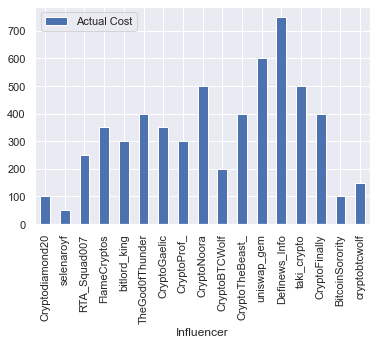

In [20]:
PD.plot(x='Influencer' ,y= 'Actual Cost',kind='bar')

### In this we can see which charge more money for marketing a product / campaign.

In [21]:
PD1=PD.rename({'Influencer': 'twitter_handle'}, axis=1) # Rename the variable from merge
PD1

,twitter_handle,Actual Cost
0,Cryptodiamond20,100
1,selenaroyf,50
2,RTA_Squad007,250
3,FlameCryptos,350
4,bitlord_king,300
5,TheGod0fThunder,400
6,CryptoGaelic,350
7,CryptoProf_,300
8,CryptoNoora,500
9,CryptoBTCWolf,200


In [22]:
BP=pd.merge(Bd,PD1,on=['twitter_handle']) # Merging both worksheet Base Data and Pricing Data. on Twitter_handle variable.
BP

,user_id,twitter_handle,followers_count,following_count,tweet_count,created_at,location,name,Unnamed: 8,Actual Cost
0,1361064698557263873,CryptoTheBeast_,26299,327,1584,2021-02-14T21:28:42.000Z,Own Kingdom♔,Crypto Beast,NaN,400
1,1295347046530998272,TheGod0fThunder,40363,470,1506,2020-08-17T13:09:47.000Z,Asgard,THE GOD OF THUNDER ( THOR⚡),NaN,400
2,1141676914454618112,RTA_Squad007,20509,92,1096,2019-06-20T11:59:22Z,NaN,RTA123,NaN,250
3,1288180753491140608,Cryptodiamond20,8655,1067,704,2020-07-28T18:34:29.000Z,"Los Angles, USA",Diamond Gem,NaN,100
4,1265598537443602432,CryptoProf_,19881,215,575,2020-05-27T10:59:51Z,OnTheMoon,PROFESSOR 🔥,NaN,300
5,1132293684991545345,CryptoBTCWolf,8550,133,376,2019-05-25T14:33:46Z,BTC,CryptoBTCWolf👑,NaN,200
6,1069147269130145792,uniswap_gem,210080,489,96,2018-12-02T08:32:27.000Z,"London, England",Uniswap Gem 💎,NaN,600
7,1382741755037061121,taki_crypto,9578,11,66,2021-04-15T17:05:52.000Z,NaN,Crypto Taki,NaN,500
8,3087274114,FlameCryptos,7883,539,1253,2015-03-11T16:48:23.000Z,NaN,FlameCryptos,NaN,350
9,1073173166388797441,bitlord_king,15690,62,360,2018-12-13T11:09:56.000Z,NaN,Bitlord King,NaN,300


In [23]:
BP.drop(['Unnamed: 8'], axis = 1)# drop unneccessary variable.
#Bd.head(10).info()

,user_id,twitter_handle,followers_count,following_count,tweet_count,created_at,location,name,Actual Cost
0,1361064698557263873,CryptoTheBeast_,26299,327,1584,2021-02-14T21:28:42.000Z,Own Kingdom♔,Crypto Beast,400
1,1295347046530998272,TheGod0fThunder,40363,470,1506,2020-08-17T13:09:47.000Z,Asgard,THE GOD OF THUNDER ( THOR⚡),400
2,1141676914454618112,RTA_Squad007,20509,92,1096,2019-06-20T11:59:22Z,NaN,RTA123,250
3,1288180753491140608,Cryptodiamond20,8655,1067,704,2020-07-28T18:34:29.000Z,"Los Angles, USA",Diamond Gem,100
4,1265598537443602432,CryptoProf_,19881,215,575,2020-05-27T10:59:51Z,OnTheMoon,PROFESSOR 🔥,300
5,1132293684991545345,CryptoBTCWolf,8550,133,376,2019-05-25T14:33:46Z,BTC,CryptoBTCWolf👑,200
6,1069147269130145792,uniswap_gem,210080,489,96,2018-12-02T08:32:27.000Z,"London, England",Uniswap Gem 💎,600
7,1382741755037061121,taki_crypto,9578,11,66,2021-04-15T17:05:52.000Z,NaN,Crypto Taki,500
8,3087274114,FlameCryptos,7883,539,1253,2015-03-11T16:48:23.000Z,NaN,FlameCryptos,350
9,1073173166388797441,bitlord_king,15690,62,360,2018-12-13T11:09:56.000Z,NaN,Bitlord King,300


In [24]:
fig = px.scatter(BP, x="Actual Cost", y='followers_count',color="name",labels=False)
fig.show()

### Plotting Follower count vs Actual cost to see charge take by influencers.

In [25]:
# Converting DataFrame into CSV file which contain select variables
pd.set_option("display.max_rows", None, "display.max_columns", None)
TD1=Td.groupby(['user_name'], sort=True)['num_retweets','num_likes','num_replies'].sum().reset_index()
#plt.figure(figsize=(20,20))
TD1.to_csv('Tweets_Data.csv')



In [26]:
# Reading CSV file
TDcsv=pd.read_csv('Tweets_Data.csv') 
TDcsv1=TDcsv.drop(['Unnamed: 0'],axis=1).iloc[1: , :]
TDcsv1

,user_name,num_retweets,num_likes,num_replies
1,CryptoBTCWolf,710329.0,856.0,48.0
2,CryptoFinally,99418.0,211289.0,57795.0
3,CryptoGaelic,1249598.0,10619.0,9275.0
4,CryptoNoora,241551.0,5709.0,2891.0
5,CryptoProf_,352151.0,5921.0,5490.0
6,CryptoTheBeast_,601795.0,35448.0,36968.0
7,Cryptodiamond20,894782.0,526.0,33.0
8,Definews_Info,384594.0,250673.0,64721.0
9,FlameCryptos,916737.0,1827.0,97.0
10,RTA_Squad007,1242898.0,17468.0,4010.0


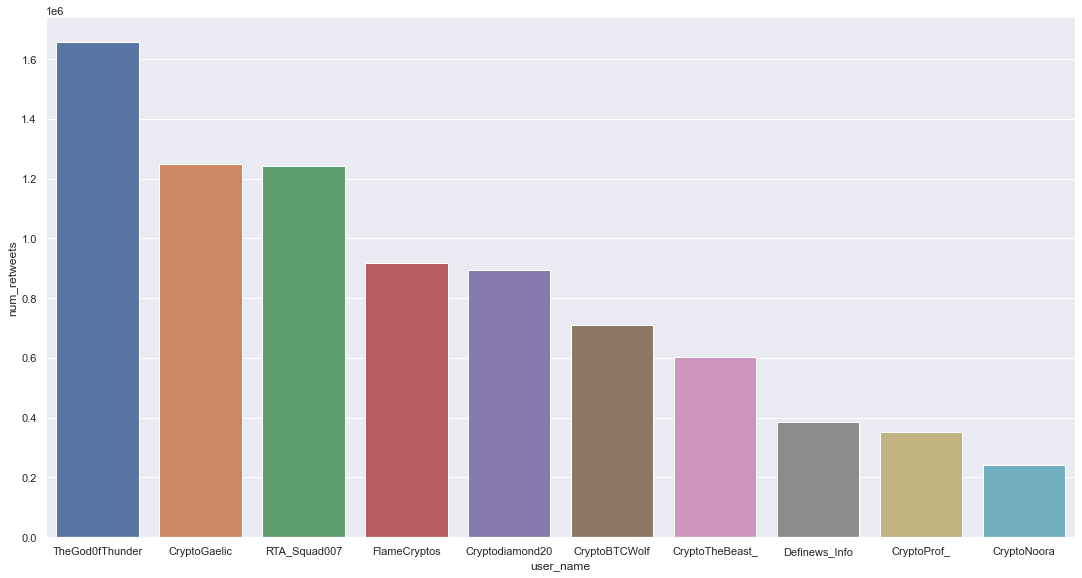

In [27]:
sns.catplot(x='user_name', y='num_retweets' ,data=TDcsv.sort_values(by='num_retweets', ascending=False)[0:10], kind='bar',height=8, aspect=15/8)

### Influencers(TheGodOfThunder) have done Maximum Number of Retweets.

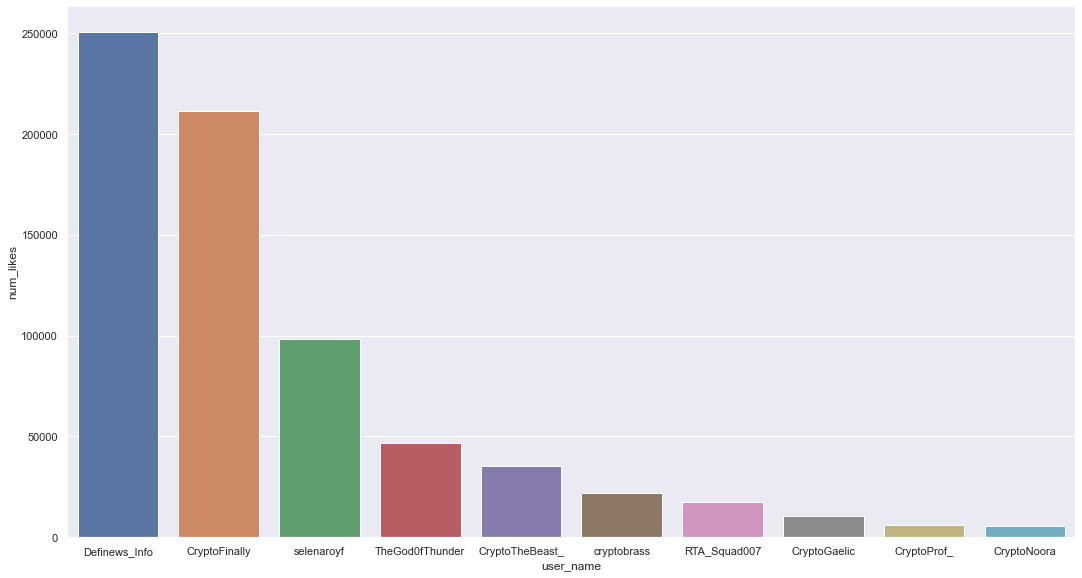

In [28]:
sns.catplot(x='user_name', y='num_likes' ,data=TDcsv.sort_values(by='num_likes', ascending=False)[0:10], kind='bar',height=8, aspect=15/8)

### Influencers(Definews_Info) have get Maximum Number of Likes on Post.

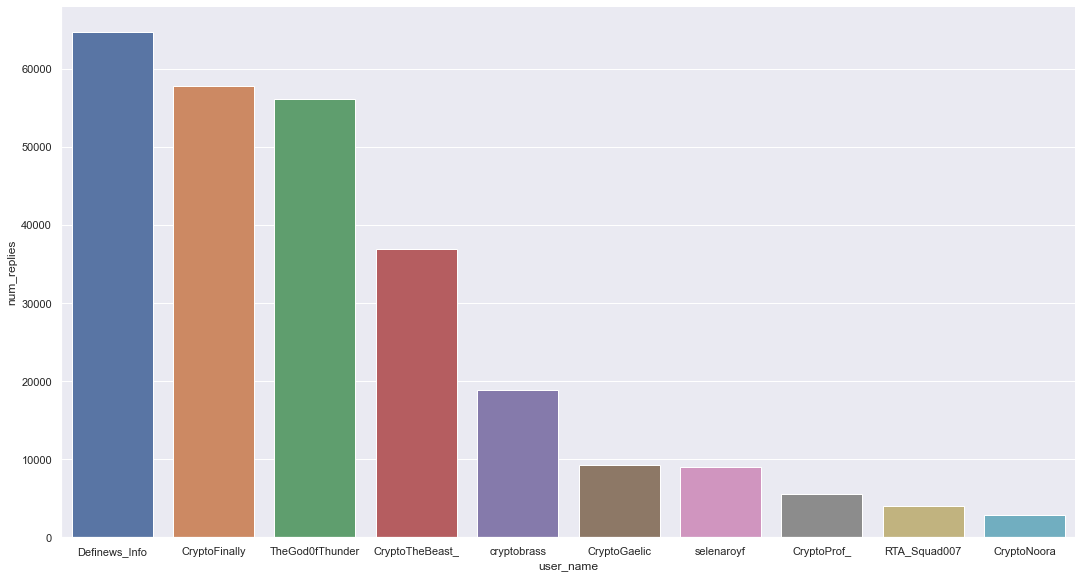

In [29]:
sns.catplot(x='user_name', y='num_replies' ,data=TDcsv.sort_values(by='num_replies', ascending=False)[0:10], kind='bar',height=8, aspect=15/8)

###  Also here,Influencers(Definews_Info) have get Maximum Number of Replies on Post.

In [30]:
#pd.set_option("display.max_rows", None, "display.max_columns", None) #
#TD1=Td.groupby(['user_name'], sort=True)['num_likes',].max().reset_index()
#plt.figure(figsize=(20,20))
#TD1

<AxesSubplot:xlabel='user_name'>

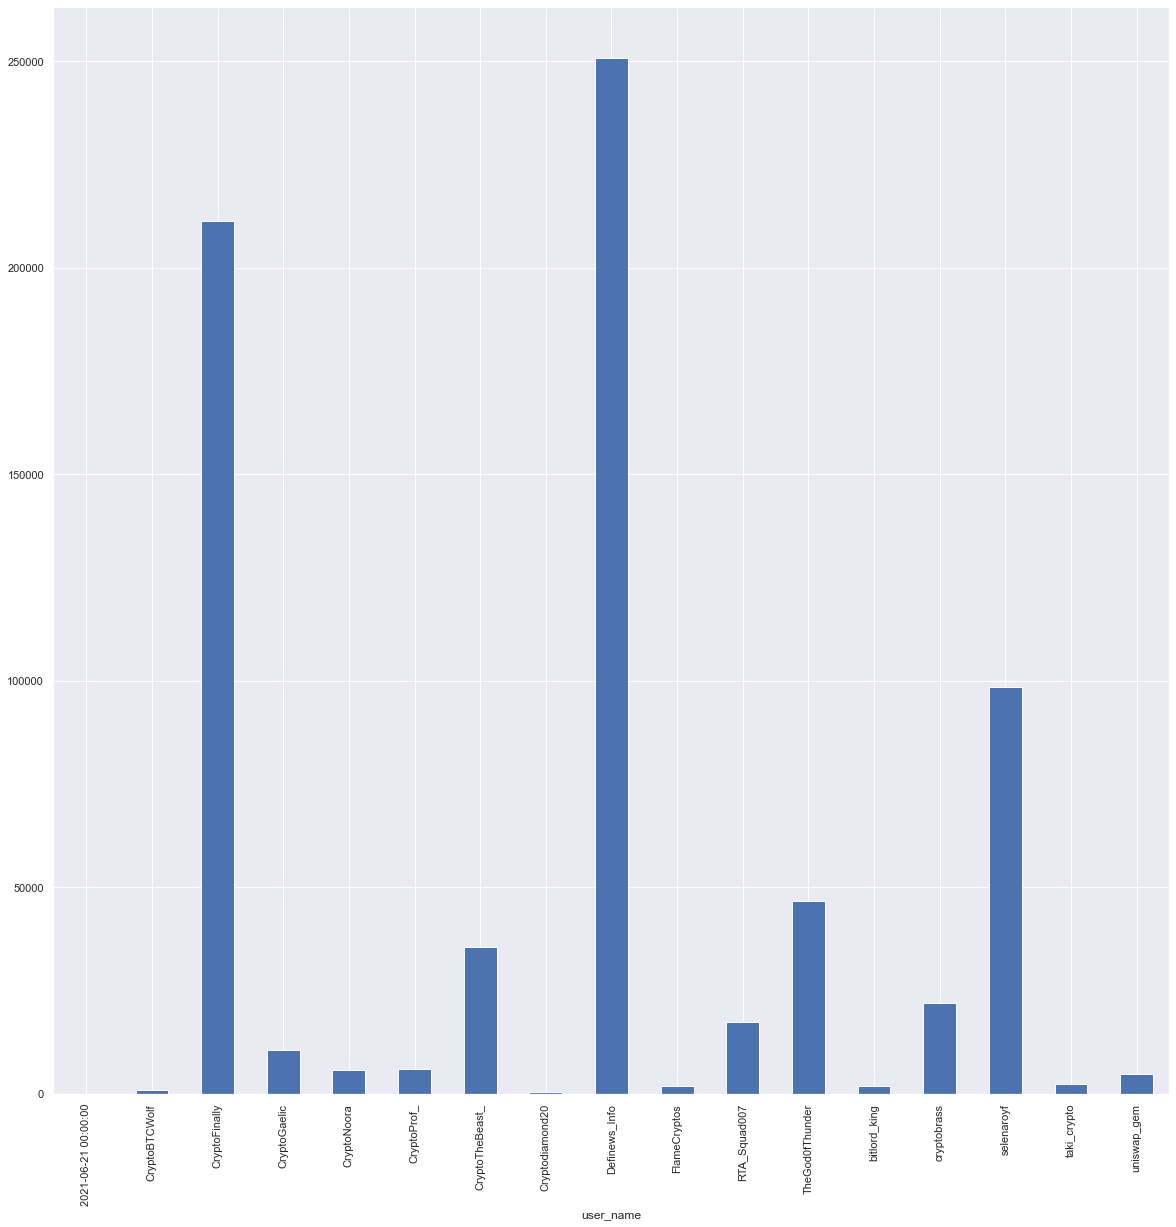

In [31]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
TD1=Td.groupby(['user_name'], sort=True)['num_likes'].sum() # Second col is index no. and last col is likes
plt.figure(figsize=(20,20))
TD1.plot(kind='bar')

### we have check most num. of like on one post, lets.
### Check if  all over count of likes of influencers is someone different . 
### Definews_info have total more likes combining of all the posts.

In [32]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#TDD=Td.groupby(['user_name'], sort=True)['num_likes'].nlargest() # Second col is index no. and last col is likes
#plt.figure(figsize=(20,20))
#TDD

In [33]:
# Total all-over likes, Replies, Retweets 
grouped_df = Td.groupby("user_name")['num_retweets','num_likes','num_replies'].sum()
maximums = grouped_df.max()
maximums = maximums.reset_index()
maxs=pd.DataFrame(maximums)
#maxs.rename(columns={'index':'Records',0:'max_records'})
maxs

,index,0
0,num_retweets,1655542.0
1,num_likes,250673.0
2,num_replies,64721.0


In [34]:
result = Td.groupby('user_name').agg({'num_retweets': ['mean', 'min', 'max']})
result.reset_index()

user_name num_retweets               
                                mean  min       max
0   2021-06-21 00:00:00     0.000000  0.0       0.0
1         CryptoBTCWolf  1084.471756  0.0   80654.0
2         CryptoFinally    30.608990  0.0   46473.0
3          CryptoGaelic   453.245557  0.0  167831.0
4           CryptoNoora   779.196774  0.0   93641.0
5           CryptoProf_   606.111876  0.0  118369.0
6       CryptoTheBeast_   186.314241  0.0   78232.0
7       Cryptodiamond20  1229.096154  0.0  118371.0
8         Definews_Info    60.565984  0.0    9616.0
9          FlameCryptos   819.979428  0.0   96707.0
10         RTA_Squad007  1463.955241  0.0  850899.0
11      TheGod0fThunder   553.137989  0.0  549912.0
12         bitlord_king    63.307927  0.0    2976.0
13          cryptobrass    70.536601  0.0   36105.0
14           selenaroyf    27.625000  0.0   37842.0
15          taki_crypto    36.857143  0.0     590.0
16          uniswap_gem    27.670732  0.0     188.0

In [35]:
#plt.figure(figsize=(20,20))
#TD1.reset_index().plot(kind='bar',x='user_name')

In [36]:
#plt.figure(figsize=(15,15))
#TDcsv1.plot.line(x='user_name',linewidth=2)

In [37]:
import plotly.express as px # camparing each influnencer likes,retweets and replies with others

fig = px.line(TDcsv1, x="user_name" ,y=['num_likes','num_retweets','num_replies'])
fig.show()

### PLotting three variable(likes,Replies, Retweets) in better visualization to compare three variables at once
### From these, we can tell tweets which had more number of Retweets have Less number of Likes on Post(TheGodOfThunder)
### And Which Influencer have less Retweets but got more number of Likes(Definews_Info)

In [38]:
Bd.rank().head()

,user_id,followers_count,following_count,tweet_count,Unnamed: 8
0,16.0,12.0,10.0,11.0,NaN
1,13.0,15.0,11.0,10.0,NaN
2,9.0,10.0,3.0,8.0,NaN
3,12.0,3.0,15.0,7.0,NaN
4,10.0,8.0,8.0,6.0,NaN


In [39]:
BD=Bd.sort_values('followers_count',ascending=False).head(5)

In [40]:
fig = px.line(BD, x="twitter_handle" ,y=['followers_count','tweet_count'])
fig.show()

### With charts, we see that uniswap_gem have more followers but done less tweets which shows he/she is not consistent with post content.
### Compare to Cryptofinally which have decent number of both followers and tweets

In [41]:
#Bd[['followers_count','following_count','tweet_count']].rank(ascending=False)

In [42]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#TD2=Td.groupby(['user_name','tweet_text'], sort=True)['num_retweets','num_likes','num_replies'].max().reset_index()
#plt.figure(figsize=(20,20))
#TD1.to_csv('Tweets_Data.csv')
#D1.plot(legend=True,kind='scatter',sort_columns=True)
#TD2    


In [43]:
# Taking Particular Influencer and checking which tweets he/she get maximum interaction.
cb=Td.query("user_name=='CryptoBTCWolf'  ")

In [44]:
a=cb[cb.num_retweets == cb.num_retweets.max()].reset_index()
b=cb[cb.num_likes == cb.num_likes.max()].reset_index()
c=cb[cb.num_likes == cb.num_replies.max()].reset_index()

In [45]:
CB=pd.concat([a,b,c])
CB[['user_name','tweet_text','language','num_retweets','num_replies','num_likes']]

,user_name,tweet_text,language,num_retweets,num_replies,num_likes
0,CryptoBTCWolf,"RT @CluCoin: We'll give a Lamborgini ($500,000...",en,80654.0,0.0,0.0
0,CryptoBTCWolf,Are you ready for $FORM 🔥\n\nThe first Smart f...,en,95.0,4.0,105.0
1,CryptoBTCWolf,Are you ready for $FORM 🔥\n\nThe first Smart f...,en,92.0,6.0,105.0


### we can conlude on which tweets CryptoBTCWolf get maximum likes, retweet,replies.

In [46]:
#creating function to create new variable influencer_tiers which identify level of influencers compare to it follower count.

def Influencer_cat(BP) :
    
    if BP["followers_count"] <= 10000 :
        return "Nano-influencers"
    elif (BP["followers_count"] > 10000) & (BP["followers_count"] <= 50000 ):
        return "Micro-influencers"
    elif (BP["followers_count"] > 50000) & (BP["followers_count"] <= 100000) :
        return "Mid-tier influencers"
    elif (BP["followers_count"] > 100000) & (BP["followers_count"] <= 150000) :
        return "Macro-influencers"
    elif BP["followers_count"] > 150000 & (BP["followers_count"] <= 200000):
        return "Super-influencers"
BP["influencer_tiers"] = BP.apply(lambda BP:Influencer_cat(BP),axis = 1)

In [47]:
# this level we had created for influencers
BP[['twitter_handle','followers_count','influencer_tiers']].sort_values('followers_count', ascending=False)

,twitter_handle,followers_count,influencer_tiers
6,uniswap_gem,210080,Super-influencers
13,CryptoFinally,149356,Macro-influencers
1,TheGod0fThunder,40363,Micro-influencers
10,Definews_Info,34877,Micro-influencers
0,CryptoTheBeast_,26299,Micro-influencers
14,BitcoinSorority,21432,Micro-influencers
2,RTA_Squad007,20509,Micro-influencers
15,selenaroyf,19906,Micro-influencers
4,CryptoProf_,19881,Micro-influencers
12,CryptoNoora,19737,Micro-influencers


In [48]:
BP.head()

,user_id,twitter_handle,followers_count,following_count,tweet_count,created_at,location,name,Unnamed: 8,Actual Cost,influencer_tiers
0,1361064698557263873,CryptoTheBeast_,26299,327,1584,2021-02-14T21:28:42.000Z,Own Kingdom♔,Crypto Beast,NaN,400,Micro-influencers
1,1295347046530998272,TheGod0fThunder,40363,470,1506,2020-08-17T13:09:47.000Z,Asgard,THE GOD OF THUNDER ( THOR⚡),NaN,400,Micro-influencers
2,1141676914454618112,RTA_Squad007,20509,92,1096,2019-06-20T11:59:22Z,NaN,RTA123,NaN,250,Micro-influencers
3,1288180753491140608,Cryptodiamond20,8655,1067,704,2020-07-28T18:34:29.000Z,"Los Angles, USA",Diamond Gem,NaN,100,Nano-influencers
4,1265598537443602432,CryptoProf_,19881,215,575,2020-05-27T10:59:51Z,OnTheMoon,PROFESSOR 🔥,NaN,300,Micro-influencers


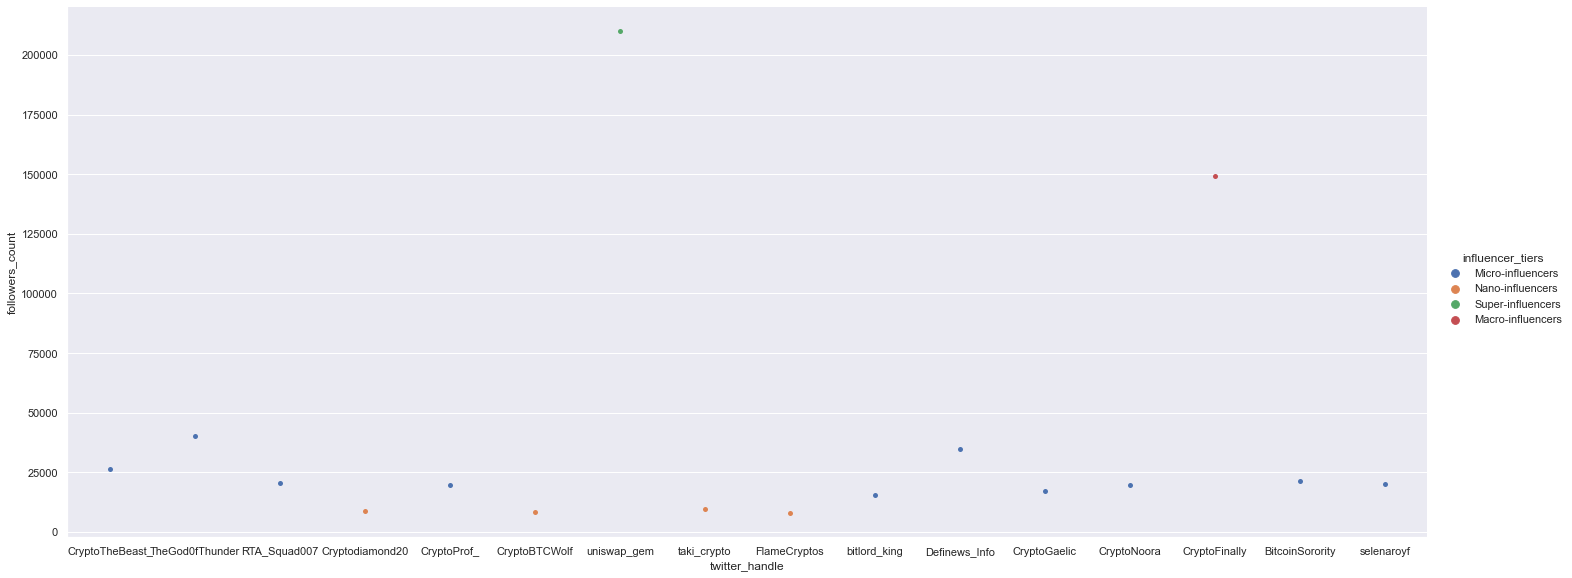

In [49]:

sns.catplot(x="twitter_handle", y="followers_count", hue="influencer_tiers", kind="swarm", data=BP,height=8, aspect=25/10)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

### Plotting Graph of Influencers tiers of user.

In [50]:
#Taking of Important variables that use for analysis
BP1=BP.groupby('twitter_handle')['followers_count','tweet_count','Actual Cost','influencer_tiers'].max().reset_index().rename(columns={'twitter_handle':'user_name'})
BP1

,user_name,followers_count,tweet_count,Actual Cost,influencer_tiers
0,BitcoinSorority,21432,1601,100,Micro-influencers
1,CryptoBTCWolf,8550,376,200,Nano-influencers
2,CryptoFinally,149356,56461,400,Macro-influencers
3,CryptoGaelic,16980,3304,350,Micro-influencers
4,CryptoNoora,19737,335,500,Micro-influencers
5,CryptoProf_,19881,575,300,Micro-influencers
6,CryptoTheBeast_,26299,1584,400,Micro-influencers
7,Cryptodiamond20,8655,704,100,Nano-influencers
8,Definews_Info,34877,4910,750,Micro-influencers
9,FlameCryptos,7883,1253,350,Nano-influencers


In [51]:
#sorting follower count in descending order
BP1[['user_name','followers_count','Actual Cost','influencer_tiers']].sort_values('followers_count',ascending=False)

,user_name,followers_count,Actual Cost,influencer_tiers
15,uniswap_gem,210080,600,Super-influencers
2,CryptoFinally,149356,400,Macro-influencers
11,TheGod0fThunder,40363,400,Micro-influencers
8,Definews_Info,34877,750,Micro-influencers
6,CryptoTheBeast_,26299,400,Micro-influencers
0,BitcoinSorority,21432,100,Micro-influencers
10,RTA_Squad007,20509,250,Micro-influencers
13,selenaroyf,19906,50,Micro-influencers
5,CryptoProf_,19881,300,Micro-influencers
4,CryptoNoora,19737,500,Micro-influencers


In [52]:
TDcsv1.reset_index().drop('index',axis=1)# reseting index to create dataframe

,user_name,num_retweets,num_likes,num_replies
0,CryptoBTCWolf,710329.0,856.0,48.0
1,CryptoFinally,99418.0,211289.0,57795.0
2,CryptoGaelic,1249598.0,10619.0,9275.0
3,CryptoNoora,241551.0,5709.0,2891.0
4,CryptoProf_,352151.0,5921.0,5490.0
5,CryptoTheBeast_,601795.0,35448.0,36968.0
6,Cryptodiamond20,894782.0,526.0,33.0
7,Definews_Info,384594.0,250673.0,64721.0
8,FlameCryptos,916737.0,1827.0,97.0
9,RTA_Squad007,1242898.0,17468.0,4010.0


In [53]:
# we merge both variable we create above into one. to merge on user_name
Rank=pd.merge(BP1,TDcsv1,on=['user_name'])
Followers_rank=Rank.sort_values(['followers_count'],ascending=False).head()
Followers_rank.drop(['tweet_count','Actual Cost','num_retweets','num_likes','num_replies'],axis=1,inplace=True)
Followers_rank['Rank'] = Followers_rank.followers_count.rank(method='dense',ascending = False).astype(int)
Followers_rank.sort_values(['Rank'], inplace=True)
Followers_rank

,user_name,followers_count,influencer_tiers,Rank
14,uniswap_gem,210080,Super-influencers,1
1,CryptoFinally,149356,Macro-influencers,2
10,TheGod0fThunder,40363,Micro-influencers,3
7,Definews_Info,34877,Micro-influencers,4
5,CryptoTheBeast_,26299,Micro-influencers,5


In [54]:
Rank['Number_of_likes_Per_Tweet']=Rank['num_replies']/Rank['tweet_count']

<AxesSubplot:xlabel='user_name'>

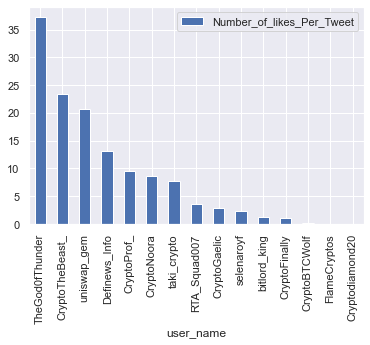

In [55]:
Tweet_Rate=Rank[['user_name','Number_of_likes_Per_Tweet']].sort_values('Number_of_likes_Per_Tweet',ascending=False)
Tweet_Rate['Rank']=Tweet_Rate['Number_of_likes_Per_Tweet'].rank(method='dense',ascending = False).astype(int)
Tweet_Rate.plot(kind='bar', x='user_name',y='Number_of_likes_Per_Tweet' )

In [56]:
Rank['Number_of_likes_Per_Likes']=Rank['num_likes']/Rank['tweet_count']

<AxesSubplot:xlabel='user_name'>

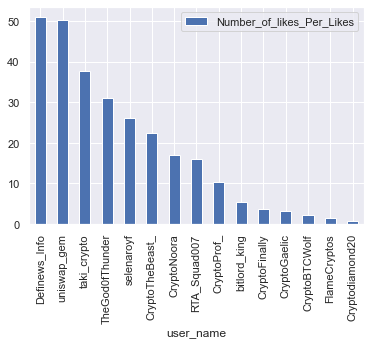

In [57]:
likes_Rate=Rank[['user_name','Number_of_likes_Per_Likes']].sort_values('Number_of_likes_Per_Likes',ascending=False)
likes_Rate['Rank']=likes_Rate['Number_of_likes_Per_Likes'].rank(method='dense',ascending = False).astype(int)
likes_Rate.plot(kind='bar', x='user_name',y='Number_of_likes_Per_Likes' )

In [58]:
Rank['Number_of_likes_Per_Retweet']=Rank['num_retweets']/Rank['tweet_count']

<AxesSubplot:xlabel='user_name'>

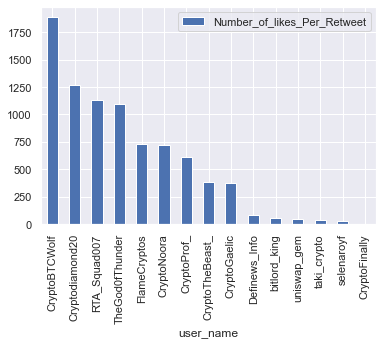

In [59]:
Retweets_Rate=Rank[['user_name','Number_of_likes_Per_Retweet']].sort_values('Number_of_likes_Per_Retweet',ascending=False)
Retweets_Rate['Rank']=Retweets_Rate['Number_of_likes_Per_Retweet'].rank(method='dense',ascending = False).astype(int)
Retweets_Rate.plot(kind='bar', x='user_name',y='Number_of_likes_Per_Retweet' )

In [60]:
plt.figure(figsize=(15,15))
fig = px.line(Rank, x="user_name" ,y=['followers_count','tweet_count','Actual Cost','num_retweets','num_likes','num_replies'],width=1000, height=800)
fig.show()

<Figure size 1080x1080 with 0 Axes>

### Above graph have all variable we are use to compare with each others.
### AS we see we cannot rank influencers on one variable because which have more followers tend to have less interaction with audience and have high cost.

### Lets take every variables and rank the influencer based on it.In below tables. 
# And What are the different metrics that should be considered while assessing the quality of influencers?

In [61]:
follower_rank=Rank.sort_values(['followers_count'],ascending=False).head(5)
follower_rank.drop(['tweet_count','Actual Cost','num_retweets','num_likes','num_replies'],axis=1,inplace=True)
follower_rank['Rank'] = follower_rank.followers_count.rank(method='dense',ascending = False).astype(int)
follower_rank.sort_values(['Rank'], inplace=True)
follower_rank

,user_name,followers_count,influencer_tiers,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Rank
14,uniswap_gem,210080,Super-influencers,20.625000,50.427083,47.270833,1
1,CryptoFinally,149356,Macro-influencers,1.023627,3.742211,1.760826,2
10,TheGod0fThunder,40363,Micro-influencers,37.264940,30.998008,1099.297477,3
7,Definews_Info,34877,Micro-influencers,13.181466,51.053564,78.328717,4
5,CryptoTheBeast_,26299,Micro-influencers,23.338384,22.378788,379.921086,5


In [62]:
Tweet_rank=Rank.sort_values(['tweet_count'],ascending=False).head(5)
Tweet_rank.drop(['followers_count','Actual Cost','num_retweets','num_likes','num_replies'],axis=1,inplace=True)
Tweet_rank['Rank'] = Tweet_rank.tweet_count.rank(method='dense',ascending = False).astype(int)
Tweet_rank.sort_values(['Rank'], inplace=True)
Tweet_rank

,user_name,tweet_count,influencer_tiers,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Rank
1,CryptoFinally,56461,Macro-influencers,1.023627,3.742211,1.760826,1
7,Definews_Info,4910,Micro-influencers,13.181466,51.053564,78.328717,2
12,selenaroyf,3784,Micro-influencers,2.363636,26.022463,23.945560,3
2,CryptoGaelic,3304,Micro-influencers,2.807203,3.213983,378.207627,4
5,CryptoTheBeast_,1584,Micro-influencers,23.338384,22.378788,379.921086,5


In [63]:
Cost_Rank=Rank.sort_values(['Actual Cost'],ascending=False).head(5)
Cost_Rank.drop(['tweet_count','followers_count','num_retweets','num_likes','num_replies'],axis=1,inplace=True)
Cost_Rank['Rank'] = Cost_Rank['Actual Cost'].rank(method='dense',ascending = False).astype(int)
Cost_Rank.sort_values(['Rank'], inplace=True)
Cost_Rank

,user_name,Actual Cost,influencer_tiers,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Rank
7,Definews_Info,750,Micro-influencers,13.181466,51.053564,78.328717,1
14,uniswap_gem,600,Super-influencers,20.625000,50.427083,47.270833,2
3,CryptoNoora,500,Micro-influencers,8.629851,17.041791,721.047761,3
13,taki_crypto,500,Nano-influencers,7.818182,37.712121,39.090909,3
1,CryptoFinally,400,Macro-influencers,1.023627,3.742211,1.760826,4


In [64]:
Retweets_Rank=Rank.sort_values(['num_retweets'],ascending=False).head(5)
Retweets_Rank.drop(['tweet_count','Actual Cost','followers_count','num_likes','num_replies'],axis=1,inplace=True)
Retweets_Rank['Rank'] = Retweets_Rank.num_retweets.rank(method='dense',ascending = False).astype(int)
Retweets_Rank.sort_values(['Rank'], inplace=True)
Retweets_Rank

,user_name,influencer_tiers,num_retweets,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Rank
10,TheGod0fThunder,Micro-influencers,1655542.0,37.264940,30.998008,1099.297477,1
2,CryptoGaelic,Micro-influencers,1249598.0,2.807203,3.213983,378.207627,2
9,RTA_Squad007,Micro-influencers,1242898.0,3.658759,15.937956,1134.031022,3
8,FlameCryptos,Nano-influencers,916737.0,0.077414,1.458101,731.633679,4
6,Cryptodiamond20,Nano-influencers,894782.0,0.046875,0.747159,1270.997159,5


In [65]:
likes_Rank=Rank.sort_values(['num_likes'],ascending=False).head(5)
likes_Rank.drop(['tweet_count','Actual Cost','num_retweets','followers_count','num_replies'],axis=1,inplace=True)
likes_Rank['Rank'] = likes_Rank.num_likes.rank(method='dense',ascending = False).astype(int)
likes_Rank.sort_values(['Rank'], inplace=True)
likes_Rank

,user_name,influencer_tiers,num_likes,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Rank
7,Definews_Info,Micro-influencers,250673.0,13.181466,51.053564,78.328717,1
1,CryptoFinally,Macro-influencers,211289.0,1.023627,3.742211,1.760826,2
12,selenaroyf,Micro-influencers,98469.0,2.363636,26.022463,23.945560,3
10,TheGod0fThunder,Micro-influencers,46683.0,37.264940,30.998008,1099.297477,4
5,CryptoTheBeast_,Micro-influencers,35448.0,23.338384,22.378788,379.921086,5


In [66]:
replies_rank=Rank.sort_values(['num_replies'],ascending=False).head(5)
replies_rank.drop(['tweet_count','Actual Cost','num_retweets','num_likes','followers_count'],axis=1,inplace=True)
replies_rank['Rank'] = replies_rank.num_replies.rank(method='dense',ascending = False).astype(int)
replies_rank.sort_values(['Rank'], inplace=True)
replies_rank

,user_name,influencer_tiers,num_replies,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Rank
7,Definews_Info,Micro-influencers,64721.0,13.181466,51.053564,78.328717,1
1,CryptoFinally,Macro-influencers,57795.0,1.023627,3.742211,1.760826,2
10,TheGod0fThunder,Micro-influencers,56121.0,37.264940,30.998008,1099.297477,3
5,CryptoTheBeast_,Micro-influencers,36968.0,23.338384,22.378788,379.921086,4
2,CryptoGaelic,Micro-influencers,9275.0,2.807203,3.213983,378.207627,5


### From Above table, now we can clearly say every influencers have rank high in every different category.
### we have choose different variable to rank every influencers on one variables.

In [67]:
Rank

,user_name,followers_count,tweet_count,Actual Cost,influencer_tiers,num_retweets,num_likes,num_replies,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet
0,CryptoBTCWolf,8550,376,200,Nano-influencers,710329.0,856.0,48.0,0.127660,2.276596,1889.172872
1,CryptoFinally,149356,56461,400,Macro-influencers,99418.0,211289.0,57795.0,1.023627,3.742211,1.760826
2,CryptoGaelic,16980,3304,350,Micro-influencers,1249598.0,10619.0,9275.0,2.807203,3.213983,378.207627
3,CryptoNoora,19737,335,500,Micro-influencers,241551.0,5709.0,2891.0,8.629851,17.041791,721.047761
4,CryptoProf_,19881,575,300,Micro-influencers,352151.0,5921.0,5490.0,9.547826,10.297391,612.436522
5,CryptoTheBeast_,26299,1584,400,Micro-influencers,601795.0,35448.0,36968.0,23.338384,22.378788,379.921086
6,Cryptodiamond20,8655,704,100,Nano-influencers,894782.0,526.0,33.0,0.046875,0.747159,1270.997159
7,Definews_Info,34877,4910,750,Micro-influencers,384594.0,250673.0,64721.0,13.181466,51.053564,78.328717
8,FlameCryptos,7883,1253,350,Nano-influencers,916737.0,1827.0,97.0,0.077414,1.458101,731.633679
9,RTA_Squad007,20509,1096,250,Micro-influencers,1242898.0,17468.0,4010.0,3.658759,15.937956,1134.031022


### this all above table metrics are important to evaluate the influencers.
### we gonna create variable called interaction/Engagement.
### Engagements means Total number of times a user interacted with a Tweet.
### It helps to rank the influencers on fair rating, We take all variables and calculate its values.

In [68]:
# Engagements variables
Rank['Total_engagement'] = (Rank['num_likes'] + Rank['num_retweets']+Rank['num_replies']) / (Rank['followers_count']* Rank['tweet_count'] )*100
#Rank['engagement']=engagement * 100
Rank.sort_values('Total_engagement',ascending=False)

,user_name,followers_count,tweet_count,Actual Cost,influencer_tiers,num_retweets,num_likes,num_replies,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Total_engagement
0,CryptoBTCWolf,8550,376,200,Nano-influencers,710329.0,856.0,48.0,0.127660,2.276596,1889.172872,22.123709
6,Cryptodiamond20,8655,704,100,Nano-influencers,894782.0,526.0,33.0,0.046875,0.747159,1270.997159,14.694295
8,FlameCryptos,7883,1253,350,Nano-influencers,916737.0,1827.0,97.0,0.077414,1.458101,731.633679,9.300637
9,RTA_Squad007,20509,1096,250,Micro-influencers,1242898.0,17468.0,4010.0,3.658759,15.937956,1134.031022,5.624983
3,CryptoNoora,19737,335,500,Micro-influencers,241551.0,5709.0,2891.0,8.629851,17.041791,721.047761,3.783348
4,CryptoProf_,19881,575,300,Micro-influencers,352151.0,5921.0,5490.0,9.547826,10.297391,612.436522,3.180332
10,TheGod0fThunder,40363,1506,400,Micro-influencers,1655542.0,46683.0,56121.0,37.264940,30.998008,1099.297477,2.892650
2,CryptoGaelic,16980,3304,350,Micro-influencers,1249598.0,10619.0,9275.0,2.807203,3.213983,378.207627,2.262832
5,CryptoTheBeast_,26299,1584,400,Micro-influencers,601795.0,35448.0,36968.0,23.338384,22.378788,379.921086,1.618458
13,taki_crypto,9578,66,500,Nano-influencers,2580.0,2489.0,516.0,7.818182,37.712121,39.090909,0.883496


# Design a scoring mechanism to rank the influencers.

In [69]:
#Rank['engagement_rate'] = (Rank['engagement']  / Rank['followers_count'] )*100
#Rank['engagement']=engagement * 100
#Rank.sort_values('engagement_rate',ascending=False)

In [70]:
### To Design Score machenism to rank influencer.
###1) First we calculate Total no. of Interaction = (Number of Likes + num of Retweets + num of replies) 
###2) second we calculate Total no.of Impression = Followers * num of Tweets
###3) Finally, Then to calcualte the Engagement to need to divide Interaction by Impression.
 

In [71]:
Rank['Total_num_of_impression'] = ( Rank['followers_count'] *Rank['tweet_count'])

In [72]:
Rank[['user_name','Actual Cost','followers_count','tweet_count','Total_num_of_impression']].sort_values('Total_num_of_impression',ascending=False)[0:5]

,user_name,Actual Cost,followers_count,tweet_count,Total_num_of_impression
1,CryptoFinally,400,149356,56461,8432789116
7,Definews_Info,750,34877,4910,171246070
12,selenaroyf,50,19906,3784,75324304
10,TheGod0fThunder,400,40363,1506,60786678
2,CryptoGaelic,350,16980,3304,56101920


In [73]:
Rank['Total_num_of_interaction'] = (Rank['num_likes'] + Rank['num_retweets']+Rank['num_replies'])

In [74]:
#fig = px.line(Rank, x="user_name" ,y=['engagement_rate'],width=1000, height=600)
#fig.show()


In [75]:
Rank.query("influencer_tiers=='Macro-influencers'").head()

,user_name,followers_count,tweet_count,Actual Cost,influencer_tiers,num_retweets,num_likes,num_replies,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Total_engagement,Total_num_of_impression,Total_num_of_interaction
1,CryptoFinally,149356,56461,400,Macro-influencers,99418.0,211289.0,57795.0,1.023627,3.742211,1.760826,0.00437,8432789116,368502.0


In [76]:
#Rank.drop(['influencer_scores','influencer_ranking'],axis=1)


In [77]:
#Rank['Score'] = ((Rank['num_likes'] + Rank['num_retweets']+Rank['num_replies']) / (Rank['followers_count'] * Rank['tweet_count']))#.apply('{:.0%}'.format)
#Rank['engagement']=engagement * 100
Rank['Score'] = ((Rank['Total_num_of_interaction']) / Rank['Total_num_of_impression'])
Rank


,user_name,followers_count,tweet_count,Actual Cost,influencer_tiers,num_retweets,num_likes,num_replies,Number_of_likes_Per_Tweet,Number_of_likes_Per_Likes,Number_of_likes_Per_Retweet,Total_engagement,Total_num_of_impression,Total_num_of_interaction,Score
0,CryptoBTCWolf,8550,376,200,Nano-influencers,710329.0,856.0,48.0,0.127660,2.276596,1889.172872,22.123709,3214800,711233.0,0.221237
1,CryptoFinally,149356,56461,400,Macro-influencers,99418.0,211289.0,57795.0,1.023627,3.742211,1.760826,0.004370,8432789116,368502.0,0.000044
2,CryptoGaelic,16980,3304,350,Micro-influencers,1249598.0,10619.0,9275.0,2.807203,3.213983,378.207627,2.262832,56101920,1269492.0,0.022628
3,CryptoNoora,19737,335,500,Micro-influencers,241551.0,5709.0,2891.0,8.629851,17.041791,721.047761,3.783348,6611895,250151.0,0.037833
4,CryptoProf_,19881,575,300,Micro-influencers,352151.0,5921.0,5490.0,9.547826,10.297391,612.436522,3.180332,11431575,363562.0,0.031803
5,CryptoTheBeast_,26299,1584,400,Micro-influencers,601795.0,35448.0,36968.0,23.338384,22.378788,379.921086,1.618458,41657616,674211.0,0.016185
6,Cryptodiamond20,8655,704,100,Nano-influencers,894782.0,526.0,33.0,0.046875,0.747159,1270.997159,14.694295,6093120,895341.0,0.146943
7,Definews_Info,34877,4910,750,Micro-influencers,384594.0,250673.0,64721.0,13.181466,51.053564,78.328717,0.408761,171246070,699988.0,0.004088
8,FlameCryptos,7883,1253,350,Nano-influencers,916737.0,1827.0,97.0,0.077414,1.458101,731.633679,9.300637,9877399,918661.0,0.093006
9,RTA_Squad007,20509,1096,250,Micro-influencers,1242898.0,17468.0,4010.0,3.658759,15.937956,1134.031022,5.624983,22477864,1264376.0,0.056250


In [78]:
Rank['Score_in_%'] = ((Rank['num_likes'] + Rank['num_retweets']+Rank['num_replies']) / (Rank['followers_count'] * Rank['tweet_count'])).apply('{:.0%}'.format)
#Rank['engagement']=engagement * 100
Score_of_Influencers=Rank[['user_name','Actual Cost','Score','Score_in_%']].sort_values('Score',ascending=False)[0:5]
Score_of_Influencers['Rank'] = Score_of_Influencers['Score'].rank(method='dense',ascending = False).astype(int)
Score_of_Influencers.sort_values(['Rank'], inplace=True)
Score_of_Influencers

,user_name,Actual Cost,Score,Score_in_%,Rank
0,CryptoBTCWolf,200,0.221237,22%,1
6,Cryptodiamond20,100,0.146943,15%,2
8,FlameCryptos,350,0.093006,9%,3
9,RTA_Squad007,250,0.056250,6%,4
3,CryptoNoora,500,0.037833,4%,5


In [79]:
Rank['Total_num_interaction'] = (Rank['num_likes'] + Rank['num_retweets']+Rank['num_replies'])
#pd.Series(["{0:.0f}%".format(val * 100) for val in Rank.loc["Total_num_react"]])
Rank[['user_name','Actual Cost','num_retweets','num_likes','num_replies','Total_num_interaction']].sort_values('Total_num_interaction',ascending=False)[0:5]

,user_name,Actual Cost,num_retweets,num_likes,num_replies,Total_num_interaction
10,TheGod0fThunder,400,1655542.0,46683.0,56121.0,1758346.0
2,CryptoGaelic,350,1249598.0,10619.0,9275.0,1269492.0
9,RTA_Squad007,250,1242898.0,17468.0,4010.0,1264376.0
8,FlameCryptos,350,916737.0,1827.0,97.0,918661.0
6,Cryptodiamond20,100,894782.0,526.0,33.0,895341.0


<AxesSubplot:xlabel='user_name'>

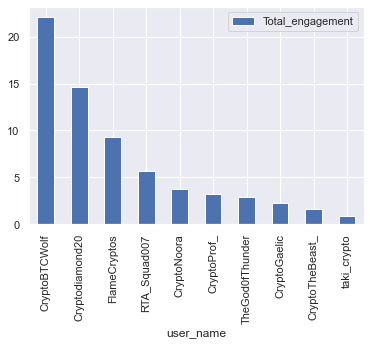

In [80]:
Rank[['user_name','Total_engagement']].sort_values('Total_engagement',ascending=False)[0:10].plot(kind='bar',x='user_name',y='Total_engagement')

In [81]:
#Total_nun_interaction=(Rank['num_likes'] + Rank['num_retweets']+Rank['num_replies'])
#Total_nun_interaction

In [82]:
#Rank['impression'] = ( Rank['followers_count'] *Rank['tweet_count'])


In [83]:
Rank[['user_name','Actual Cost','followers_count','Total_num_interaction','Total_num_of_impression','Total_engagement']].sort_values('Total_engagement',ascending=False)[0:5]

,user_name,Actual Cost,followers_count,Total_num_interaction,Total_num_of_impression,Total_engagement
0,CryptoBTCWolf,200,8550,711233.0,3214800,22.123709
6,Cryptodiamond20,100,8655,895341.0,6093120,14.694295
8,FlameCryptos,350,7883,918661.0,9877399,9.300637
9,RTA_Squad007,250,20509,1264376.0,22477864,5.624983
3,CryptoNoora,500,19737,250151.0,6611895,3.783348


In [84]:
Rank[['user_name','Actual Cost','followers_count','tweet_count','Total_num_of_impression']].sort_values('Total_num_of_impression',ascending=False)[0:5]

,user_name,Actual Cost,followers_count,tweet_count,Total_num_of_impression
1,CryptoFinally,400,149356,56461,8432789116
7,Definews_Info,750,34877,4910,171246070
12,selenaroyf,50,19906,3784,75324304
10,TheGod0fThunder,400,40363,1506,60786678
2,CryptoGaelic,350,16980,3304,56101920


In [85]:
#Rank['rank_scores'] = ((Rank['tweet_count'] + Rank['followers_count'] ) / Rank['Actual Cost'])

In [86]:
Rank['rank_scores'] = (Rank['followers_count'] / Rank['Actual Cost'] ) 

In [87]:
Rank[['user_name','rank_scores','influencer_tiers','Actual Cost']].sort_values('rank_scores',ascending=False)

,user_name,rank_scores,influencer_tiers,Actual Cost
12,selenaroyf,398.120000,Micro-influencers,50
1,CryptoFinally,373.390000,Macro-influencers,400
14,uniswap_gem,350.133333,Super-influencers,600
10,TheGod0fThunder,100.907500,Micro-influencers,400
6,Cryptodiamond20,86.550000,Nano-influencers,100
9,RTA_Squad007,82.036000,Micro-influencers,250
4,CryptoProf_,66.270000,Micro-influencers,300
5,CryptoTheBeast_,65.747500,Micro-influencers,400
11,bitlord_king,52.300000,Micro-influencers,300
2,CryptoGaelic,48.514286,Micro-influencers,350


> Conversation Rate. Because you need to be "social" on social media.
= Number of Replies Per Tweet
= Total number of Replies / Total number of tweets

In [88]:
Rank['Number_of_Replies_Per_Tweet']=Rank['num_replies']/Rank['tweet_count']
#Conversation_Rate['Rank'] = Conversation_Rate.Number_of_Replies_Per_Tweet.rank(method='dense',ascending = False).astype(int)
#Number_of_Replies_Per_Tweet.sort_values(['Rank'], inplace=True)


In [89]:
#Conversation Rate. Because you need to be "social" on social media.  Total number of Replies / Total number of tweets

Conversation_Rate=Rank[['user_name','Number_of_Replies_Per_Tweet']].sort_values('Number_of_Replies_Per_Tweet',ascending=False)
#Rank['Number_of_Replies_Per_Tweet'].rank(method='dense',ascending = False).astype(int)
Conversation_Rate['Rank']=Conversation_Rate['Number_of_Replies_Per_Tweet'].rank(method='dense',ascending = False).astype(int)
Conversation_Rate

,user_name,Number_of_Replies_Per_Tweet,Rank
10,TheGod0fThunder,37.264940,1
5,CryptoTheBeast_,23.338384,2
14,uniswap_gem,20.625000,3
7,Definews_Info,13.181466,4
4,CryptoProf_,9.547826,5
3,CryptoNoora,8.629851,6
13,taki_crypto,7.818182,7
9,RTA_Squad007,3.658759,8
2,CryptoGaelic,2.807203,9
12,selenaroyf,2.363636,10


> Amplification Rate. How frequently are you tapping in to your "second level" network? i.e. reaching followers of followers?
= Number of Retweets Per Tweet
= Total number of RTs / Total number of tweets

In [90]:
Rank['Number_of_retweets_Per_Tweet']=Rank['num_retweets']/Rank['tweet_count']


In [91]:
Amplification_Rate=Rank[['user_name','Number_of_retweets_Per_Tweet']].sort_values('Number_of_retweets_Per_Tweet',ascending=False)
Amplification_Rate['Rank']=Amplification_Rate['Number_of_retweets_Per_Tweet'].rank(method='dense',ascending = False).astype(int)
Amplification_Rate#.plot(kind='bar', x='user_name',y='Number_of_retweets_Per_Tweet' )

,user_name,Number_of_retweets_Per_Tweet,Rank
0,CryptoBTCWolf,1889.172872,1
6,Cryptodiamond20,1270.997159,2
9,RTA_Squad007,1134.031022,3
10,TheGod0fThunder,1099.297477,4
8,FlameCryptos,731.633679,5
3,CryptoNoora,721.047761,6
4,CryptoProf_,612.436522,7
5,CryptoTheBeast_,379.921086,8
2,CryptoGaelic,378.207627,9
7,Definews_Info,78.328717,10


In [92]:
Rank[['user_name','followers_count','Actual Cost']]

,user_name,followers_count,Actual Cost
0,CryptoBTCWolf,8550,200
1,CryptoFinally,149356,400
2,CryptoGaelic,16980,350
3,CryptoNoora,19737,500
4,CryptoProf_,19881,300
5,CryptoTheBeast_,26299,400
6,Cryptodiamond20,8655,100
7,Definews_Info,34877,750
8,FlameCryptos,7883,350
9,RTA_Squad007,20509,250


In [93]:
# Calculating the cost per 1000 followers
Rank['cost_per_1000_follower($)']=((Rank['Actual Cost'] * 1000) / Rank['followers_count'])

In [94]:
import math
cost=Rank[['user_name','followers_count','Actual Cost','cost_per_1000_follower($)']].sort_values('cost_per_1000_follower($)',ascending=False)
#cost#.round({'cost_per_1000_follower':4})
#cost['cost_per_1000_follower($)'].round(1)
cost

,user_name,followers_count,Actual Cost,cost_per_1000_follower($)
13,taki_crypto,9578,500,52.202965
8,FlameCryptos,7883,350,44.399340
3,CryptoNoora,19737,500,25.333131
0,CryptoBTCWolf,8550,200,23.391813
7,Definews_Info,34877,750,21.504143
2,CryptoGaelic,16980,350,20.612485
11,bitlord_king,15690,300,19.120459
5,CryptoTheBeast_,26299,400,15.209704
4,CryptoProf_,19881,300,15.089784
9,RTA_Squad007,20509,250,12.189770


In [95]:
# Tweets analysis
cb=Td.query("user_name=='CryptoBTCWolf'  ")

In [96]:
cb['language'].value_counts()

en     531
und    110
ht       4
in       2
pt       2
fr       2
da       2
es       2
Name: language, dtype: int64

## Extra Analysis
## Analyzing tweets of top 2 Influencers

In [97]:
cb_var=cb #copy variable

In [98]:
#the UTF-8 encoding of the Unicode character with that codepoint
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}
pd.set_option('display.max_colwidth',150)
cb_var[['user_name','tweet_text','language']].head(10)

,user_name,tweet_text,language
8943,CryptoBTCWolf,Every day more good $FORM news🚀\n@gate_io Startup Project : $FORM @FormationFi\n \nTrading pairs: #FORM/ #USDT\nPrice: 0 USDT (Public price: $0.0...,en
8944,CryptoBTCWolf,@Het_Heerschap But it’s just the starting bro 👀🚀,en
8945,CryptoBTCWolf,RT @Friends_Bsc: 🛋 Friends Fan Token 🛋\n\n$FRIENDS\n \n🦞 Contract📝:\n0x3482A16B8E765Da099B35D3e4C23F125f5B27069\n\n 💰Tokenomics 💰\n • Total Supply…,en
8946,CryptoBTCWolf,"Everything has done, $MATIC / $BTC are fit buy zone, time to break up 🔥\n\nBought a big bag, don’t want to miss this 🚀 https://t.co/rCV3xHO6Bx",en
8947,CryptoBTCWolf,RT @michael_saylor: “Honesty is the first chapter in the book of wisdom.” - Thomas Jefferson on #Bitcoin,en
8948,CryptoBTCWolf,Are you ready for $FORM 🔥\n\nThe first Smart farming 2.0 Risk Parity. Revolutionizing DEFI Portfolio Construction &amp; Yield Protection.\n\nTurn ...,en
8949,CryptoBTCWolf,RT @CoinDeskMarkets: $BTC held minor support along a series of lower price highs. Upside appears limited beyond $40K.\n \nhttps://t.co/ms54MT…,en
8950,CryptoBTCWolf,RT @cryptonary: Why Are Educated Investors Not Worried About The Dip?,en
8951,CryptoBTCWolf,"Here is a tutorial on how to buy $SOV 🔥\n\n• https://t.co/pGKORTKzph\n• Click ""Engage Wallet"" (connect your @Trezor / @ledger)\n• Click #FastBTC\n...",en
8952,CryptoBTCWolf,$SOV market is sleeping on Defi on #bitcoin. \n\nAlready seen what layer 2 lightning is brining. Don’t hear a peep about layer 2 rsk.\n\nIt is gro...,en


In [99]:
cb_var['clean_tweets'] = (cb_var['tweet_text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))
cb_var.clean_tweets=cb_var.tweet_text.str.lower()
cb_var['clean_tweets'] = cb_var['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
cb_var.head(2)

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets
8943,1404029256431149056,Every day more good $FORM news🚀\n@gate_io Startup Project : $FORM @FormationFi\n \nTrading pairs: #FORM/ #USDT\nPrice: 0 USDT (Public price: $0.0...,2021-06-13T10:53:54.000Z,en,48.0,4.0,51.0,0,-,-,CryptoBTCWolf,every day more good $form news🚀\n@gate_io startup project : $form @formationfi\n \ntrading pairs: #form/ #usdt\nprice: 0 usdt (public price: $0.0...
8944,1403847313613672450,@Het_Heerschap But it’s just the starting bro 👀🚀,2021-06-12T22:50:56.000Z,en,0.0,0.0,1.0,0,"[{'type': 'replied_to', 'id': '1403801438992670725'}]",241112375,CryptoBTCWolf,@het_heerschap but it’s just the starting bro 👀🚀


In [100]:
#remove_punctuation
import string
string.punctuation
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt
cb_var['clean_tweets']=cb_var['clean_tweets'].apply(lambda x : remove_punctuation(x))
cb_var.head(2)

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets
8943,1404029256431149056,Every day more good $FORM news🚀\n@gate_io Startup Project : $FORM @FormationFi\n \nTrading pairs: #FORM/ #USDT\nPrice: 0 USDT (Public price: $0.0...,2021-06-13T10:53:54.000Z,en,48.0,4.0,51.0,0,-,-,CryptoBTCWolf,every day more good form news🚀\ngateio startup project form formationfi\n \ntrading pairs form usdt\nprice 0 usdt public price 003\nsupply 83333...
8944,1403847313613672450,@Het_Heerschap But it’s just the starting bro 👀🚀,2021-06-12T22:50:56.000Z,en,0.0,0.0,1.0,0,"[{'type': 'replied_to', 'id': '1403801438992670725'}]",241112375,CryptoBTCWolf,hetheerschap but it’s just the starting bro 👀🚀


In [101]:
cb_var['clean_tweets'] = cb_var['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere
cb_var.head(2)
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
cb_var['clean_tweets'] = cb_var['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Zakir
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:

import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement
cb_var['clean_tweets']= cb_var.clean_tweets.apply(round2)
cb_var.head()

[nltk_data] Downloading package words to C:\Users\Zakir
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets
8943,1404029256431149056,Every day more good $FORM news🚀\n@gate_io Startup Project : $FORM @FormationFi\n \nTrading pairs: #FORM/ #USDT\nPrice: 0 USDT (Public price: $0.0...,2021-06-13T10:53:54.000Z,en,48.0,4.0,51.0,0,-,-,CryptoBTCWolf,every day good form news project form trading form price public price supply form
8944,1403847313613672450,@Het_Heerschap But it’s just the starting bro 👀🚀,2021-06-12T22:50:56.000Z,en,0.0,0.0,1.0,0,"[{'type': 'replied_to', 'id': '1403801438992670725'}]",241112375,CryptoBTCWolf,starting
8945,1403831603453911040,RT @Friends_Bsc: 🛋 Friends Fan Token 🛋\n\n$FRIENDS\n \n🦞 Contract📝:\n0x3482A16B8E765Da099B35D3e4C23F125f5B27069\n\n 💰Tokenomics 💰\n • Total Supply…,2021-06-12T21:48:30.000Z,en,15.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403789780958203910'}]",-,CryptoBTCWolf,fan token contract total supply
8946,1403793377146163204,"Everything has done, $MATIC / $BTC are fit buy zone, time to break up 🔥\n\nBought a big bag, don’t want to miss this 🚀 https://t.co/rCV3xHO6Bx",2021-06-12T19:16:36.000Z,en,7.0,2.0,25.0,0,-,-,CryptoBTCWolf,everything done fit buy zone time break bought big bag don want miss
8947,1403702885884387328,RT @michael_saylor: “Honesty is the first chapter in the book of wisdom.” - Thomas Jefferson on #Bitcoin,2021-06-12T13:17:02.000Z,en,933.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403702296685461511'}]",-,CryptoBTCWolf,honesty first chapter book wisdom


In [103]:

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [104]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
cb_var['polarity'] = cb_var['tweet_text'].apply(pol)
cb_var.head(5)

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets,polarity
8943,1404029256431149056,Every day more good $FORM news🚀\n@gate_io Startup Project : $FORM @FormationFi\n \nTrading pairs: #FORM/ #USDT\nPrice: 0 USDT (Public price: $0.0...,2021-06-13T10:53:54.000Z,en,48.0,4.0,51.0,0,-,-,CryptoBTCWolf,every day good form news project form trading form price public price supply form,0.40
8944,1403847313613672450,@Het_Heerschap But it’s just the starting bro 👀🚀,2021-06-12T22:50:56.000Z,en,0.0,0.0,1.0,0,"[{'type': 'replied_to', 'id': '1403801438992670725'}]",241112375,CryptoBTCWolf,starting,0.00
8945,1403831603453911040,RT @Friends_Bsc: 🛋 Friends Fan Token 🛋\n\n$FRIENDS\n \n🦞 Contract📝:\n0x3482A16B8E765Da099B35D3e4C23F125f5B27069\n\n 💰Tokenomics 💰\n • Total Supply…,2021-06-12T21:48:30.000Z,en,15.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403789780958203910'}]",-,CryptoBTCWolf,fan token contract total supply,0.00
8946,1403793377146163204,"Everything has done, $MATIC / $BTC are fit buy zone, time to break up 🔥\n\nBought a big bag, don’t want to miss this 🚀 https://t.co/rCV3xHO6Bx",2021-06-12T19:16:36.000Z,en,7.0,2.0,25.0,0,-,-,CryptoBTCWolf,everything done fit buy zone time break bought big bag don want miss,0.20
8947,1403702885884387328,RT @michael_saylor: “Honesty is the first chapter in the book of wisdom.” - Thomas Jefferson on #Bitcoin,2021-06-12T13:17:02.000Z,en,933.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403702296685461511'}]",-,CryptoBTCWolf,honesty first chapter book wisdom,0.25


In [105]:
cb_var['Sentiment'] = np.where(cb_var['polarity']>=0, 'Positive', 'Negative')
cb_var.head()

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets,polarity,Sentiment
8943,1404029256431149056,Every day more good $FORM news🚀\n@gate_io Startup Project : $FORM @FormationFi\n \nTrading pairs: #FORM/ #USDT\nPrice: 0 USDT (Public price: $0.0...,2021-06-13T10:53:54.000Z,en,48.0,4.0,51.0,0,-,-,CryptoBTCWolf,every day good form news project form trading form price public price supply form,0.40,Positive
8944,1403847313613672450,@Het_Heerschap But it’s just the starting bro 👀🚀,2021-06-12T22:50:56.000Z,en,0.0,0.0,1.0,0,"[{'type': 'replied_to', 'id': '1403801438992670725'}]",241112375,CryptoBTCWolf,starting,0.00,Positive
8945,1403831603453911040,RT @Friends_Bsc: 🛋 Friends Fan Token 🛋\n\n$FRIENDS\n \n🦞 Contract📝:\n0x3482A16B8E765Da099B35D3e4C23F125f5B27069\n\n 💰Tokenomics 💰\n • Total Supply…,2021-06-12T21:48:30.000Z,en,15.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403789780958203910'}]",-,CryptoBTCWolf,fan token contract total supply,0.00,Positive
8946,1403793377146163204,"Everything has done, $MATIC / $BTC are fit buy zone, time to break up 🔥\n\nBought a big bag, don’t want to miss this 🚀 https://t.co/rCV3xHO6Bx",2021-06-12T19:16:36.000Z,en,7.0,2.0,25.0,0,-,-,CryptoBTCWolf,everything done fit buy zone time break bought big bag don want miss,0.20,Positive
8947,1403702885884387328,RT @michael_saylor: “Honesty is the first chapter in the book of wisdom.” - Thomas Jefferson on #Bitcoin,2021-06-12T13:17:02.000Z,en,933.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403702296685461511'}]",-,CryptoBTCWolf,honesty first chapter book wisdom,0.25,Positive


<AxesSubplot:>

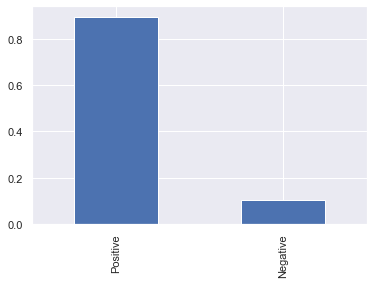

In [106]:
cb_var.Sentiment.value_counts(normalize = True).plot(kind='bar')

In [107]:
a1=cb_var[cb_var.num_retweets == cb_var.num_retweets.max()].reset_index()
b1=cb_var[cb_var.num_likes == cb_var.num_likes.max()].reset_index()
c1=cb_var[cb_var.num_replies == cb_var.num_replies.max()].reset_index()

In [108]:
a1[['language','num_retweets','clean_tweets','Sentiment']]
b1[['language','num_likes','clean_tweets','Sentiment']]
c1[['language','num_replies','clean_tweets','Sentiment']]
cb_final=pd.concat([a1,b1,c1])
cb_final[['language','num_replies','num_likes','num_retweets','clean_tweets','Sentiment']]

,language,num_replies,num_likes,num_retweets,clean_tweets,Sentiment
0,en,0.0,0.0,80654.0,well give random person within next winner must,Negative
0,en,4.0,105.0,95.0,ready form first smart farming risk parity portfolio construction yield protection turn volume form,Positive
1,en,6.0,105.0,92.0,ready form first smart farming risk parity portfolio construction yield protection turn volume form,Positive
0,en,6.0,105.0,92.0,ready form first smart farming risk parity portfolio construction yield protection turn volume form,Positive


In [109]:
# Counting most frequent word tweets by influencers
def most_frequent_values(data):
    total = cb_var[['language','num_replies','num_likes','num_retweets','tweet_text','clean_tweets','Sentiment']].count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(cb_var[['language','num_replies','num_likes','num_retweets','tweet_text','clean_tweets','Sentiment']])

,language,num_replies,num_likes,num_retweets,tweet_text,clean_tweets,Sentiment
Total,655,655,655,655,655,655,655
Most frequent item,en,0.0,0.0,0.0,@Roca_Marketing @ChibiSiGhie @_maessyyyyy @s_ummerfrost,,Positive
Frequence,531,639,614,120,4,116,588
Percent from total,81.069,97.557,93.74,18.321,0.611,17.71,89.771


In [110]:
word_series = pd.Series(' '.join(cb_var['clean_tweets']).lower().split())
top_freq = word_series.value_counts()[:5]

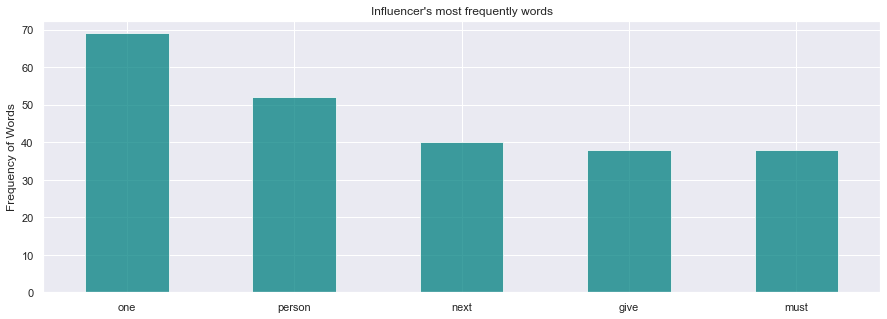

In [111]:
#Word frequecy graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.title("Influencer's most frequently words")

top_freq.plot(kind='bar',color='teal',alpha=0.75, rot=0)                            
plt.ylabel('Frequency of Words')
plt.show()

In [112]:
#Word cloud graph
from nltk.corpus import stopwords
from wordcloud import WordCloud 
stopwords = set(stopwords.words("english"))

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

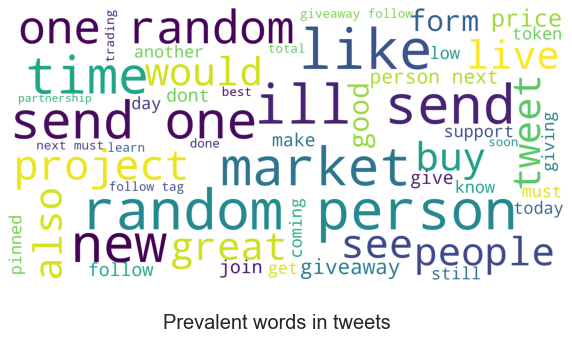

In [113]:
show_wordcloud(cb_var['clean_tweets'], title = 'Prevalent words in tweets')

<AxesSubplot:>

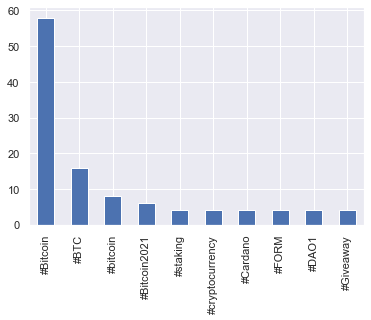

In [114]:
#Number hashtags use by influencer
cb_var.tweet_text.str.extractall(r'(\#\w+)')[0].value_counts()[0:10].plot(kind='bar')

In [115]:
#cryptodiamond tweets analysis
cd=Td.query("user_name=='Cryptodiamond20'  ")

In [116]:
a2=cd[cd.num_retweets == cd.num_retweets.max()].reset_index()
b2=cd[cd.num_likes == cd.num_likes.max()].reset_index()
c2=cd[cd.num_replies == cd.num_replies.max()].reset_index()
a2[['language','num_retweets']]
b2[['language','num_likes',]]
c2[['language','num_replies']]
cd_final=pd.concat([a2,b2,c2])
cd_final[['language','num_replies','num_likes','num_retweets']]

,language,num_replies,num_likes,num_retweets
0,en,0.0,0.0,118371.0
0,en,6.0,84.0,88.0
0,en,6.0,18.0,11.0
1,en,6.0,84.0,88.0


In [117]:
#the UTF-8 encoding of the Unicode character with that codepoint
characterMap = {u'\u00E7': 'c', u'\u00C7' : 'C', u'\u011F' : 'g', u'\u011E' : 'G', 
                u'\u00F6': 'o', u'\u00D6' : 'O', u'\u015F' : 's', u'\u015E' : 'S', 
                u'\u00FC' : 'u', u'\u00DC' : 'U' , u'\u0131' : 'i', u'\u0049' : 'I', 
                u'\u0259' : 'e', u'\u018F' : 'E'}
pd.set_option('display.max_colwidth',150)
cd.head(2)

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name
1956,1405954555511115778,"RT @KumaInuOfficial: Morning! Since we launched, our community is growing and growing. Despite different countries, languages, we have only…",2021-06-18T18:24:22.000Z,en,28.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405869411014115329'}]",-,Cryptodiamond20
1957,1405951809693229056,RT @BistrooIO: One week to go untill the #Dutch Blockchain Days!📆\n\n@BCNLfoundation and @BCcoalitionNL have joined forces with @EY_Nederland…,2021-06-18T18:13:27.000Z,en,2.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405865204013993987'}]",-,Cryptodiamond20


In [118]:
cd['clean_tweets'] = (cd['tweet_text'].astype("str")
                              .str.rstrip()   ## is used to remove extra white space at the end of the string
                              .replace(characterMap, regex=True)
                              .str.normalize('NFKD')  ## never skip the letter
                              .str.encode('ascii', errors='ignore')
                              .str.decode('utf-8'))
cd.clean_tweets=cd.tweet_text.str.lower()
cd['clean_tweets'] = cd['clean_tweets'].str.replace(r'http\S+|www.\S+','',case=False) ## http is a key word ,s+means anywhere
cd.head(2)

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets
1956,1405954555511115778,"RT @KumaInuOfficial: Morning! Since we launched, our community is growing and growing. Despite different countries, languages, we have only…",2021-06-18T18:24:22.000Z,en,28.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405869411014115329'}]",-,Cryptodiamond20,"rt @kumainuofficial: morning! since we launched, our community is growing and growing. despite different countries, languages, we have only…"
1957,1405951809693229056,RT @BistrooIO: One week to go untill the #Dutch Blockchain Days!📆\n\n@BCNLfoundation and @BCcoalitionNL have joined forces with @EY_Nederland…,2021-06-18T18:13:27.000Z,en,2.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405865204013993987'}]",-,Cryptodiamond20,rt @bistrooio: one week to go untill the #dutch blockchain days!📆\n\n@bcnlfoundation and @bccoalitionnl have joined forces with @ey_nederland…


In [119]:
#remove_punctuation
import string
string.punctuation
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt
cd['clean_tweets']=cd['clean_tweets'].apply(lambda x : remove_punctuation(x))
cd.head(2)

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets
1956,1405954555511115778,"RT @KumaInuOfficial: Morning! Since we launched, our community is growing and growing. Despite different countries, languages, we have only…",2021-06-18T18:24:22.000Z,en,28.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405869411014115329'}]",-,Cryptodiamond20,rt kumainuofficial morning since we launched our community is growing and growing despite different countries languages we have only…
1957,1405951809693229056,RT @BistrooIO: One week to go untill the #Dutch Blockchain Days!📆\n\n@BCNLfoundation and @BCcoalitionNL have joined forces with @EY_Nederland…,2021-06-18T18:13:27.000Z,en,2.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405865204013993987'}]",-,Cryptodiamond20,rt bistrooio one week to go untill the dutch blockchain days📆\n\nbcnlfoundation and bccoalitionnl have joined forces with eynederland…


In [120]:
cd['clean_tweets'] = cd['clean_tweets'].str.replace('\d+', '')  #  /d+ is to find numbers from anywhere
cd.head(2)
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
cd['clean_tweets'] = cd['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\Zakir
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
import re
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)  # search for single letter than replace # b is for aplhabet
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text) # search for combination of small or capital than replace
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
    return text

round2 = lambda x: clean_text_round2(x)
# sub is used for replacement
cd['clean_tweets']= cd.clean_tweets.apply(round2)
cd.head()

[nltk_data] Downloading package words to C:\Users\Zakir
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets
1956,1405954555511115778,"RT @KumaInuOfficial: Morning! Since we launched, our community is growing and growing. Despite different countries, languages, we have only…",2021-06-18T18:24:22.000Z,en,28.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405869411014115329'}]",-,Cryptodiamond20,morning since community growing growing despite different only
1957,1405951809693229056,RT @BistrooIO: One week to go untill the #Dutch Blockchain Days!📆\n\n@BCNLfoundation and @BCcoalitionNL have joined forces with @EY_Nederland…,2021-06-18T18:13:27.000Z,en,2.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405865204013993987'}]",-,Cryptodiamond20,one week untill dutch days
1958,1405951436676997124,RT @Mr_LSD_Crypto: Introducing @baepaychan 🔥\n\nOne of the biggest physical NFT art exhibitions is coming to life later this June – Japan’s v…,2021-06-18T18:11:58.000Z,en,23.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405951392271847431'}]",-,Cryptodiamond20,one biggest physical art coming life later june japan
1959,1405951130174050307,RT @Futurov_: How to acquire $FTV 📺\n\nUseful links:\n\nChart : 📈https://t.co/lqsbNxadZc\n\nBscscan: https://t.co/0INOyceSPP\n\nPancakeSwap: https:…,2021-06-18T18:10:45.000Z,en,23.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405941302903160836'}]",-,Cryptodiamond20,acquire useful links chart
1960,1405895606611038209,📌Dutch Blockchain Days are coming in this 24 &amp;25th June 2021.\n#DBD21 #BCNL #DBC https://t.co/saSQTnTOh5,2021-06-18T14:30:07.000Z,en,1.0,0.0,1.0,0,"[{'type': 'quoted', 'id': '1405865204013993987'}]",-,Cryptodiamond20,dutch days coming june


In [122]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [123]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
cd['polarity'] = cd['clean_tweets'].apply(pol)
cd.head(5)

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets,polarity
1956,1405954555511115778,"RT @KumaInuOfficial: Morning! Since we launched, our community is growing and growing. Despite different countries, languages, we have only…",2021-06-18T18:24:22.000Z,en,28.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405869411014115329'}]",-,Cryptodiamond20,morning since community growing growing despite different only,0.0
1957,1405951809693229056,RT @BistrooIO: One week to go untill the #Dutch Blockchain Days!📆\n\n@BCNLfoundation and @BCcoalitionNL have joined forces with @EY_Nederland…,2021-06-18T18:13:27.000Z,en,2.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405865204013993987'}]",-,Cryptodiamond20,one week untill dutch days,0.0
1958,1405951436676997124,RT @Mr_LSD_Crypto: Introducing @baepaychan 🔥\n\nOne of the biggest physical NFT art exhibitions is coming to life later this June – Japan’s v…,2021-06-18T18:11:58.000Z,en,23.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405951392271847431'}]",-,Cryptodiamond20,one biggest physical art coming life later june japan,0.0
1959,1405951130174050307,RT @Futurov_: How to acquire $FTV 📺\n\nUseful links:\n\nChart : 📈https://t.co/lqsbNxadZc\n\nBscscan: https://t.co/0INOyceSPP\n\nPancakeSwap: https:…,2021-06-18T18:10:45.000Z,en,23.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1405941302903160836'}]",-,Cryptodiamond20,acquire useful links chart,0.3
1960,1405895606611038209,📌Dutch Blockchain Days are coming in this 24 &amp;25th June 2021.\n#DBD21 #BCNL #DBC https://t.co/saSQTnTOh5,2021-06-18T14:30:07.000Z,en,1.0,0.0,1.0,0,"[{'type': 'quoted', 'id': '1405865204013993987'}]",-,Cryptodiamond20,dutch days coming june,0.0


In [124]:
cd['Sentiment'] = np.where(cd['polarity']>=0, 'Positive', 'Negative')
cd[['language','num_replies','num_likes','num_retweets','clean_tweets','Sentiment']]

,language,num_replies,num_likes,num_retweets,clean_tweets,Sentiment
1956,en,0.0,0.0,28.0,morning since community growing growing despite different only,Positive
1957,en,0.0,0.0,2.0,one week untill dutch days,Positive
1958,en,0.0,0.0,23.0,one biggest physical art coming life later june japan,Positive
1959,en,0.0,0.0,23.0,acquire useful links chart,Positive
1960,en,0.0,1.0,1.0,dutch days coming june,Positive
1961,en,0.0,0.0,52.0,closely looking forward comes recently protocol grand open,Positive
1962,en,2.0,7.0,6.0,state art exchange protocol built ecosystem few left token sale round finalize less,Negative
1963,en,0.0,0.0,25.0,last call token sale round finalize less,Negative
1964,en,0.0,0.0,90.0,officially live major definitely going big get you,Positive
1965,en,0.0,0.0,45.0,hour left form live theres one question left ready,Positive


<AxesSubplot:ylabel='Sentiment'>

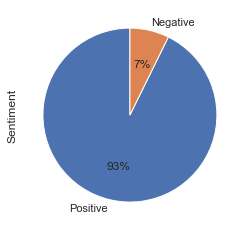

In [125]:
cd.Sentiment.value_counts(normalize = True).plot(kind='pie',autopct='%0.0f%%',startangle=90)


In [126]:
def most_frequent_values(data):
    total = cd[['language','num_replies','num_likes','num_retweets','tweet_text','clean_tweets','Sentiment']].count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(cd[['language','num_replies','num_likes','num_retweets','tweet_text','clean_tweets','Sentiment']])

,language,num_replies,num_likes,num_retweets,tweet_text,clean_tweets,Sentiment
Total,728,728,728,728,728,728,728
Most frequent item,en,0.0,0.0,0.0,Exactly to achieve the goal these are the rules. https://t.co/SZMcRZbfbB,,Positive
Frequence,693,711,670,47,1,42,675
Percent from total,95.192,97.665,92.033,6.456,0.137,5.769,92.72


In [127]:
word_series = pd.Series(' '.join(cd['clean_tweets']).lower().split())
top_freq = word_series.value_counts()[:5]

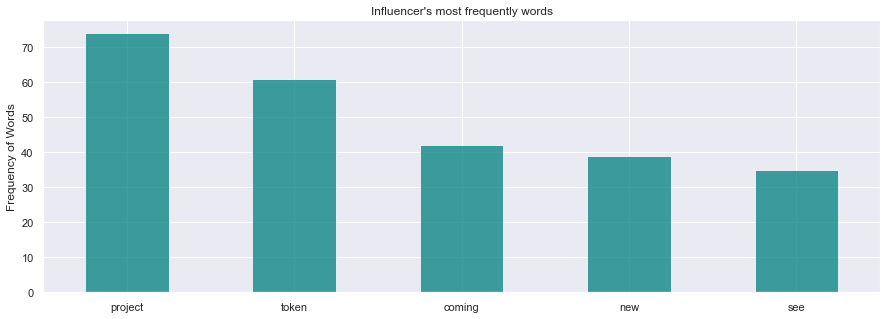

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.title("Influencer's most frequently words")

top_freq.plot(kind='bar',color='teal',alpha=0.75, rot=0)                            
plt.ylabel('Frequency of Words')
plt.show()

In [129]:
from nltk.corpus import stopwords
from wordcloud import WordCloud 
stopwords = set(stopwords.words("english"))

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

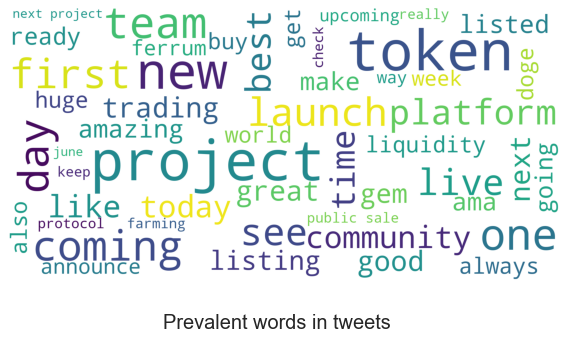

In [130]:
show_wordcloud(cd['clean_tweets'], title = 'Prevalent words in tweets')

In [131]:
cb_var['hashtags']=cb_var.tweet_text.str.findall(r'#.*?(?=\s|$)')
cb_var.head(10)    

,tweet_id,tweet_text,created_at,language,num_retweets,num_replies,num_likes,num_quotes,referenced_tweets,reply_to_userid,user_name,clean_tweets,polarity,Sentiment,hashtags
8943,1404029256431149056,Every day more good $FORM news🚀\n@gate_io Startup Project : $FORM @FormationFi\n \nTrading pairs: #FORM/ #USDT\nPrice: 0 USDT (Public price: $0.0...,2021-06-13T10:53:54.000Z,en,48.0,4.0,51.0,0,-,-,CryptoBTCWolf,every day good form news project form trading form price public price supply form,0.400000,Positive,"[#FORM/, #USDT, #FORM]"
8944,1403847313613672450,@Het_Heerschap But it’s just the starting bro 👀🚀,2021-06-12T22:50:56.000Z,en,0.0,0.0,1.0,0,"[{'type': 'replied_to', 'id': '1403801438992670725'}]",241112375,CryptoBTCWolf,starting,0.000000,Positive,[]
8945,1403831603453911040,RT @Friends_Bsc: 🛋 Friends Fan Token 🛋\n\n$FRIENDS\n \n🦞 Contract📝:\n0x3482A16B8E765Da099B35D3e4C23F125f5B27069\n\n 💰Tokenomics 💰\n • Total Supply…,2021-06-12T21:48:30.000Z,en,15.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403789780958203910'}]",-,CryptoBTCWolf,fan token contract total supply,0.000000,Positive,[]
8946,1403793377146163204,"Everything has done, $MATIC / $BTC are fit buy zone, time to break up 🔥\n\nBought a big bag, don’t want to miss this 🚀 https://t.co/rCV3xHO6Bx",2021-06-12T19:16:36.000Z,en,7.0,2.0,25.0,0,-,-,CryptoBTCWolf,everything done fit buy zone time break bought big bag don want miss,0.200000,Positive,[]
8947,1403702885884387328,RT @michael_saylor: “Honesty is the first chapter in the book of wisdom.” - Thomas Jefferson on #Bitcoin,2021-06-12T13:17:02.000Z,en,933.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403702296685461511'}]",-,CryptoBTCWolf,honesty first chapter book wisdom,0.250000,Positive,[#Bitcoin]
8948,1403644324198293507,Are you ready for $FORM 🔥\n\nThe first Smart farming 2.0 Risk Parity. Revolutionizing DEFI Portfolio Construction &amp; Yield Protection.\n\nTurn ...,2021-06-12T09:24:19.000Z,en,95.0,4.0,105.0,0,-,-,CryptoBTCWolf,ready form first smart farming risk parity portfolio construction yield protection turn volume form,0.221429,Positive,[#DeFi]
8949,1403316407538839555,RT @CoinDeskMarkets: $BTC held minor support along a series of lower price highs. Upside appears limited beyond $40K.\n \nhttps://t.co/ms54MT…,2021-06-11T11:41:18.000Z,en,42.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1403313682063532034'}]",-,CryptoBTCWolf,minor support along series lower price upside limited beyond,-0.060714,Negative,[]
8950,1403315340948381696,RT @cryptonary: Why Are Educated Investors Not Worried About The Dip?,2021-06-11T11:37:04.000Z,en,806.0,0.0,0.0,0,"[{'type': 'retweeted', 'id': '1399341281478852609'}]",-,CryptoBTCWolf,educated worried dip,0.000000,Positive,[]
8951,1403271200164380675,"Here is a tutorial on how to buy $SOV 🔥\n\n• https://t.co/pGKORTKzph\n• Click ""Engage Wallet"" (connect your @Trezor / @ledger)\n• Click #FastBTC\n...",2021-06-11T08:41:40.000Z,en,1.0,1.0,0.0,0,-,-,CryptoBTCWolf,tutorial buy sov click engage wallet connect ledger click wait one block trade sov,0.000000,Positive,[#FastBTC]
8952,1403270041622040576,$SOV market is sleeping on Defi on #bitcoin. \n\nAlready seen what layer 2 lightning is brining. Don’t hear a peep about layer 2 rsk.\n\nIt is gro...,2021-06-11T08:37:04.000Z,en,24.0,2.0,31.0,0,-,-,CryptoBTCWolf,sov market sleeping already seen layer lightning don hear peep layer growing faster almost every based project,0.000000,Positive,[#bitcoin.]


<AxesSubplot:>

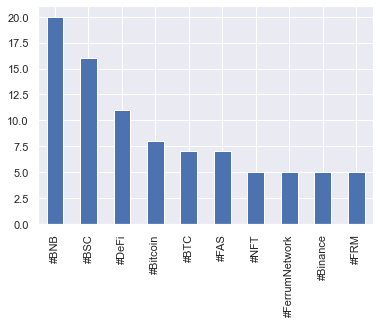

In [132]:
#Number hashtags use by influencer
cd.tweet_text.str.extractall(r'(\#\w+)')[0].value_counts()[0:10].plot(kind='bar')